# Intro to NLP

Natural Language Processing (NLP) is a subfield of artificial intelligence (AI) that focuses on the interaction between computers and human language. The primary goal of NLP is to enable machines to understand, interpret, and generate human language in a way that is both meaningful and contextually relevant. NLP helps adress the problem of "unstructured data":

## Unstructured Data

> Unstructured data (or unstructured information) is information that either does not have a pre-defined data model or is not organized in a pre-defined manner. Unstructured information is typically text-heavy, but may contain data such as dates, numbers, and facts as well. This results in irregularities and ambiguities that make it difficult to understand using traditional programs as compared to data stored in fielded form in databases or annotated (semantically tagged) in documents. - Wikipedia

Organizations and individuals deal with a growing mountain of text-based information coming from a variety of sources which, though variable in structure and length, can provide great insight into what someone is thinking or likely to purchase. 

- Companies hyper analyze text data such as reviews to get an idea about how popular their product might be and in what locations they are likely to be more popular. 

- Medical notes can have predictive value as to whether a patient might recover from a malady. 

- Publicists examine Twitter (now X) posts to determine if their clients are being perceived in a positive or negative light

- Resumes and CVs are being automatically mined to match candidates against job descriptions.

- Attorneys subpoena e-mails to examine for evidence of wrong doing

- Supreme Court cases can be used to build predictive models for use in future cases

  
<center><img src="pics/nlp_unstruct.png" width=420 height=420 /></center>

## Semi Structured Data

Some data can be considered as semi-structured. Consider job pplication forms or surveys that have a specific layout which is useful for organization responses. There could still be room for open-ended responses on these forms but there is enough structure to simplify down stream decisions. Consider that too much structure might not leave enough room for free input which is a form of bias. Whenever we require too much structure, this is a possibility.

Another form of semi-structured data are markup languages such as XML and JSON which help us take text data from a given domain and impose some agreed upon structure that simplifies its transmission between information systems or programs. Many Application Programming Interfaces (APIs) will return data in JSON or XML since modern programming languages such as Python have modules to parse the information. This relieves the programmer from having to create custom code for each interaction with a text-based data source.

As an example here is how we could access the Open Movie Database and get information about a movie. Note that you will need to use your own OMDB key. This site will return information in JSON which imposes a pre-determined structure over the information relating to the specified movie. 

<center><img src="pics/nlp_godzilla.png"  /></center>


In [2]:
## 
## Note this code will not work unless you supply
## an API key
##

import requests
import json

# Sign up for your FREE key at omdbapi.com

mykey = "f7c004c"
# Define the URL
url = "https://www.omdbapi.com/?apikey="+mykey+"&t=Godzilla"

# Make a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    movie_data = response.json()
    
    # Print the formatted JSON response
    print(json.dumps(movie_data, indent=4))
else:
    # Print an error message if the request was not successful
    print("Error:", response.status_code)


{
    "Title": "Godzilla",
    "Year": "2014",
    "Rated": "PG-13",
    "Released": "16 May 2014",
    "Runtime": "123 min",
    "Genre": "Action, Adventure, Sci-Fi",
    "Director": "Gareth Edwards",
    "Writer": "Dave Callaham, Max Borenstein",
    "Actors": "Aaron Taylor-Johnson, Elizabeth Olsen, Bryan Cranston",
    "Plot": "The world is beset by the appearance of monstrous creatures, but one of them may be the only one who can save humanity.",
    "Language": "English, Japanese",
    "Country": "United States, Japan",
    "Awards": "7 wins & 31 nominations total",
    "Poster": "https://m.media-amazon.com/images/M/MV5BODE2NTdmMmYtY2U1OS00MjExLWIwNjQtYjQ5NTA0ZDZmZjZiXkEyXkFqcGc@._V1_SX300.jpg",
    "Ratings": [
        {
            "Source": "Internet Movie Database",
            "Value": "6.4/10"
        },
        {
            "Source": "Rotten Tomatoes",
            "Value": "76%"
        },
        {
            "Source": "Metacritic",
            "Value": "62/100"
        

In [3]:
url = "https://www.omdbapi.com/?apikey="+mykey+"&t=Game Of Thrones"

# Make a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    movie_data = response.json()
    
    # Print the formatted JSON response
    print(json.dumps(movie_data, indent=4))
else:
    # Print an error message if the request was not successful
    print("Error:", response.status_code)


{
    "Title": "Game of Thrones",
    "Year": "2011\u20132019",
    "Rated": "TV-MA",
    "Released": "17 Apr 2011",
    "Runtime": "57 min",
    "Genre": "Action, Adventure, Drama",
    "Director": "N/A",
    "Writer": "David Benioff, D.B. Weiss",
    "Actors": "Emilia Clarke, Peter Dinklage, Kit Harington",
    "Plot": "Nine noble families fight for control over the lands of Westeros, while an ancient enemy returns after being dormant for millennia.",
    "Language": "English",
    "Country": "United States, United Kingdom",
    "Awards": "Won 59 Primetime Emmys. 396 wins & 655 nominations total",
    "Poster": "https://m.media-amazon.com/images/M/MV5BMTNhMDJmNmYtNDQ5OS00ODdlLWE0ZDAtZTgyYTIwNDY3OTU3XkEyXkFqcGc@._V1_SX300.jpg",
    "Ratings": [
        {
            "Source": "Internet Movie Database",
            "Value": "9.2/10"
        }
    ],
    "Metascore": "N/A",
    "imdbRating": "9.2",
    "imdbVotes": "2,517,225",
    "imdbID": "tt0944947",
    "Type": "series",
    "total

In [4]:
import requests
import pandas as pd

def get_episodes_with_ratings(imdb_id, total_seasons):
    episodes = []
    for season in range(1, total_seasons + 1):
        url = f'http://www.omdbapi.com/?i={imdb_id}&Season={season}&apikey=f7c004c'
        response = requests.get(url)
        data = response.json()
        if data.get('Response') == 'True':
            for episode in data.get('Episodes', []):
                episodes.append({
                    'Season': season,
                    'Episode': episode['Episode'],
                    'Title': episode['Title'],
                    'Rating': episode.get('imdbRating', 'N/A')  # Get IMDb rating or 'N/A' if not available
                })
        else:
            print(f"Error fetching data for Season {season}: {data.get('Error')}")
    return episodes

# Get all episodes for Game of Thrones
imdb_id = 'tt0944947'  # IMDB ID for Game of Thrones
total_seasons = 8
episodes = get_episodes_with_ratings(imdb_id, total_seasons)

# Convert to pandas DataFrame
df = pd.DataFrame(episodes)

# Display the DataFrame
print(df.head())  # Display the first few rows of the DataFrame


   Season Episode                                    Title Rating
0       1       0  Game of Thrones: Unaired Original Pilot    N/A
1       1       1                         Winter Is Coming    8.9
2       1       2                            The Kingsroad    8.6
3       1       3                                Lord Snow    8.5
4       1       4    Cripples, Bastards, and Broken Things    8.6


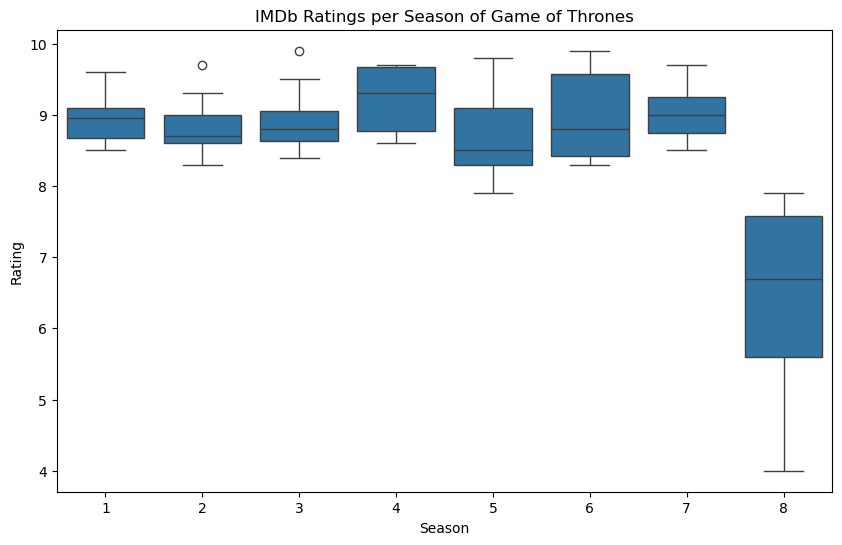

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Rating' to numeric, coercing errors (e.g., 'N/A' becomes NaN)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Create a box plot for each season's ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Rating', data=df)

# Add labels and title
plt.title('IMDb Ratings per Season of Game of Thrones')
plt.xlabel('Season')
plt.ylabel('Rating')

# Show the plot
plt.show()

## Historical Perspective:

NLP has evolved significantly over the years, with its roots dating back to the 1950s. Early attempts at machine translation and language processing were rule-based and often struggled with the complexity and nuances of human language. As technology advanced, statistical methods gained prominence, and the field saw notable progress in areas like information retrieval and text summarization.

Another way to think about it is that there is a lot of value in understanding text data and it turns out that with the rise of computation, we can implement methods even on laptops that allow us to summarize large collections of data.

## Current Landscape:

In recent years, the advent of deep learning and neural networks has revolutionized NLP. The introduction of pre-trained language models, such as BERT (Bidirectional Encoder Representations from Transformers) and GPT (Generative Pre-trained Transformer), have marked a paradigm shift. These models, based on transformer architectures, have demonstrated remarkable capabilities in understanding context, semantic relationships, and generating human-like text. This has been somewhat controversial which is actually an understatement. 

## Example Application Domains

| **Domain**                   | **Examples**                                                                                                 |
| ------------------------------ | ------------------------------------------------------------------------------------------------------------ |
| **Machine Translation**        | NLP plays a crucial role in language translation applications, breaking down language barriers and facilitating global communication. |
| **Sentiment Analysis**         | Businesses use NLP to analyze and understand customer sentiment from reviews, social media, and other textual data.  |
| **Chatbots and Virtual Assistants** | NLP powers conversational agents, enabling human-like interactions in chatbots and virtual assistants.   |
| **Information Extraction**     | NLP techniques extract structured information from unstructured text, aiding in tasks like named entity recognition and event extraction.  |
| **Text Summarization**         | Automatic summarization systems use NLP to generate concise and coherent summaries of longer texts.  |

# Important Concepts

There are a number of foundational concepts that need to be understood before embarking on a more in-depth consideration of NLP application. Thankfully, most of not all of these are intutitive ideas as they are based on human understanding of languages. The following ideas are certainly not the only ideas you will encounter in NLP but there are a starting point for a deeper understanding.

To set the tone for the rest of the notebook it is hlpeful to see what a common NLP workflow involves. This is just a general though fairly accurate assessement of the type of work involved when processing documents. Speaking of "documents" we use a more inclusive concept of that word in NLP efforts.

<div style="text-align:center">
  <img src="pics/nlp_flow.png">
</div>


## What Is A Document

In text analysis, we refer to each individual piece of text as a document, and the collection of all documents we analyze together as a **corpus**. In our examples below, each sentence (or short paragraph) in a Python list is treated as a separate document, even though they are very small. 

This is a modeling choice since from the perspective of TNLP methods, a document is simply a unit of text we want to compare to other units. The corpus provides the broader context needed to determine which words are common across documents and which words help distinguish one document from another.

Importantly, the definition of a “document” depends on the problem we are trying to solve. A document could be a single tweet, a paragraph from a speech, a chapter in a book, an entire article, or even a full transcript. 

What matters is that all documents in the corpus are treated consistently. We will soon discover that tools such as a Term Frequency - Inverse Document Frequency Matrix uses the corpus to down-weight words that appear frequently across many documents and up-weight words that help differentiate one document from the rest.

To drive this home, here are some examples of "documents"

| Domain            | What is a Document?        | What is the Corpus?                         |
|-------------------|----------------------------|---------------------------------------------|
| Tweets            | A single tweet             | A collection of tweets                      |
| Speech analysis   | A paragraph from a speech  | One full speech or multiple speeches        |
| Books             | A chapter                  | One book or a collection of books           |
| News articles     | A single article           | A news dataset or article collection        |


A document is a single unit of text we analyze, and a corpus is the collection of documents that provides context for comparison. We can then stsrt thinking about how to process documents. Human language is frequently informal, full of spelling errors, confusing grammar which sometimes makes it hard to figure out how to extract meaning from a corpus. We have common and standard technqiues to do this ourselves or by using python tools.


## Tokenization

Tokenization is a fundamental concept in Natural Language Processing (NLP) that involves breaking down a given text into smaller units called tokens. These tokens could be individual words, subwords, or even phrases, depending on the specific requirements of the analysis. 

The goal of tokenization is to convert raw text into a format that is more amenable to processing by machines. The process aids in extracting meaningful information from text data, enabling various downstream NLP tasks such as sentiment analysis, machine translation, and text summarization. 

Tokenization can be implemented using different techniques, with common approaches including word-based tokenization and subword tokenization. Each token serves as a discrete unit, forming the basis for subsequent analysis and feature extraction in NLP applications. For instance, consider the following sentence 

```
The quick brown fox
```

We could **tokenize** this into individual words: "The", "quick", "brown", "fox" each of which we could refer to as a **token**. Not much to think about there, at least on the surface. We are just looking at individual words without any thought as to the function each word plays in the sentence. That of course is something we'll consider later. 

Also, the documents we encounter in the course of our day are much larger and likely contain things like tables, figures, captions all of which might contain text descriptions. There are techniques to **parse** documents to get the **pure** text after which we can **tokenize** it for further analysis. 

In any case, the larger point is that breaking words into tokens allows us to start working with text in an abstract yet useful way. We could do things like count tokens to see how often a particular word might show up. Some simple Python code can do this. We'll look at a list that contains multiple sentences. 


In [6]:
from collections import Counter

# Sample list of words forming a couple of sentences
word_list = [
    'The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog',
    'A', 'red', 'apple', 'sits', 'on', 'the', 'table', 'next', 'to', 'a', 'book',
    'Sunflowers', 'bloom', 'in', 'the', 'garden', 'while', 'birds', 'sing', 'sweet', 'melodies',
    'The', 'moon', 'shines', 'bright', 'in', 'the', 'midnight', 'sky', 'casting', 'soft', 'shadows'
]

# Use Counter to count occurrences
word_counts = Counter(word_list)

# Display unique words and their counts
print("Word\t\tCount")
for word, count in word_counts.items():
    print(f'{word}: {count} times')


Word		Count
The: 2 times
quick: 1 times
brown: 1 times
fox: 1 times
jumps: 1 times
over: 1 times
the: 4 times
lazy: 1 times
dog: 1 times
A: 1 times
red: 1 times
apple: 1 times
sits: 1 times
on: 1 times
table: 1 times
next: 1 times
to: 1 times
a: 1 times
book: 1 times
Sunflowers: 1 times
bloom: 1 times
in: 2 times
garden: 1 times
while: 1 times
birds: 1 times
sing: 1 times
sweet: 1 times
melodies: 1 times
moon: 1 times
shines: 1 times
bright: 1 times
midnight: 1 times
sky: 1 times
casting: 1 times
soft: 1 times
shadows: 1 times


Consider that some of these words are basically the same. For example, "The" and "the" are really the same words. In NLP we tend to normalize the case of these words (not always) to simplify them for things like counting them. In this case our list looks like:

In [7]:
# Convert all words to lowercase
word_list_lower = [word.lower() for word in word_list]

# Use Counter to count occurrences
word_counts = Counter(word_list_lower)

# Display unique words and their counts
print("Word\t\tCount")
print("------------------------")
for word, count in word_counts.items():
    print(f'{word}\t\t{count}')

Word		Count
------------------------
the		6
quick		1
brown		1
fox		1
jumps		1
over		1
lazy		1
dog		1
a		2
red		1
apple		1
sits		1
on		1
table		1
next		1
to		1
book		1
sunflowers		1
bloom		1
in		2
garden		1
while		1
birds		1
sing		1
sweet		1
melodies		1
moon		1
shines		1
bright		1
midnight		1
sky		1
casting		1
soft		1
shadows		1


### A Better Example

Let's consider sometihng more involved. This is from a speech from former President Obama. We could write code to get this information off the Internet but for now I'll just get some of the text from the speech. 

```
Already, the Affordable Care Act is helping to slow the growth of health care costs. And the reforms I’m proposing go even further.  We’ll reduce taxpayer subsidies to prescription drug companies and ask more from the wealthiest seniors. We’ll bring down costs by changing the way our government pays for Medicare, because our medical bills shouldn’t be based on the number of tests ordered or days spent in the hospital; they should be based on the quality of care that our seniors receive. And I am open to additional reforms from both parties, so long as they don’t violate the guarantee of a secure retirement. Our government shouldn’t make promises we cannot keep but we must keep the promises we’ve already made.
```

So now let's use some string functions to strip out the obvious punctuation so we can focus on the words and how we might split this sentence into tokens. Again, we aren't using any NLP modules to do this. For now, let's just focus on doing this using common string functions. Here we have a one Document text Corpus.

In [8]:
import string

# Sample string
speech_text = "Already, the Affordable Care Act is helping to slow the growth of health care costs. And the reforms I’m proposing go even further. We’ll reduce taxpayer subsidies to prescription drug companies and ask more from the wealthiest seniors. We’ll bring down costs by changing the way our government pays for Medicare, because our medical bills shouldn’t be based on the number of tests ordered or days spent in the hospital; they should be based on the quality of care that our seniors receive. And I am open to additional reforms from both parties, so long as they don’t violate the guarantee of a secure retirement. Our government shouldn’t make promises we cannot keep but we must keep the promises we’ve already made."

# Remove punctuation
translator = str.maketrans("", "", string.punctuation)
speech_text_no_punctuation = speech_text.translate(translator)

# Split the text into words
word_list = speech_text_no_punctuation.split()

print(word_list)

['Already', 'the', 'Affordable', 'Care', 'Act', 'is', 'helping', 'to', 'slow', 'the', 'growth', 'of', 'health', 'care', 'costs', 'And', 'the', 'reforms', 'I’m', 'proposing', 'go', 'even', 'further', 'We’ll', 'reduce', 'taxpayer', 'subsidies', 'to', 'prescription', 'drug', 'companies', 'and', 'ask', 'more', 'from', 'the', 'wealthiest', 'seniors', 'We’ll', 'bring', 'down', 'costs', 'by', 'changing', 'the', 'way', 'our', 'government', 'pays', 'for', 'Medicare', 'because', 'our', 'medical', 'bills', 'shouldn’t', 'be', 'based', 'on', 'the', 'number', 'of', 'tests', 'ordered', 'or', 'days', 'spent', 'in', 'the', 'hospital', 'they', 'should', 'be', 'based', 'on', 'the', 'quality', 'of', 'care', 'that', 'our', 'seniors', 'receive', 'And', 'I', 'am', 'open', 'to', 'additional', 'reforms', 'from', 'both', 'parties', 'so', 'long', 'as', 'they', 'don’t', 'violate', 'the', 'guarantee', 'of', 'a', 'secure', 'retirement', 'Our', 'government', 'shouldn’t', 'make', 'promises', 'we', 'cannot', 'keep', '

In [9]:
# Let's make all the words lower case
word_list_lower = [word.lower() for word in word_list]

# Use Counter to count occurrences
word_counts = Counter(word_list_lower)

# Display unique words and their counts
print("Word\t\tCount")
print("------------------------")
for word, count in word_counts.items():
    print(f'{word}\t{count}')

Word		Count
------------------------
already	2
the	10
affordable	1
care	3
act	1
is	1
helping	1
to	3
slow	1
growth	1
of	4
health	1
costs	2
and	3
reforms	2
i’m	1
proposing	1
go	1
even	1
further	1
we’ll	2
reduce	1
taxpayer	1
subsidies	1
prescription	1
drug	1
companies	1
ask	1
more	1
from	2
wealthiest	1
seniors	2
bring	1
down	1
by	1
changing	1
way	1
our	4
government	2
pays	1
for	1
medicare	1
because	1
medical	1
bills	1
shouldn’t	2
be	2
based	2
on	2
number	1
tests	1
ordered	1
or	1
days	1
spent	1
in	1
hospital	1
they	2
should	1
quality	1
that	1
receive	1
i	1
am	1
open	1
additional	1
both	1
parties	1
so	1
long	1
as	1
don’t	1
violate	1
guarantee	1
a	1
secure	1
retirement	1
make	1
promises	2
we	2
cannot	1
keep	2
but	1
must	1
we’ve	1
made	1


Well that was informative but not particulalry pleasant to view. So let's plot this information for easier inspection and consideration.

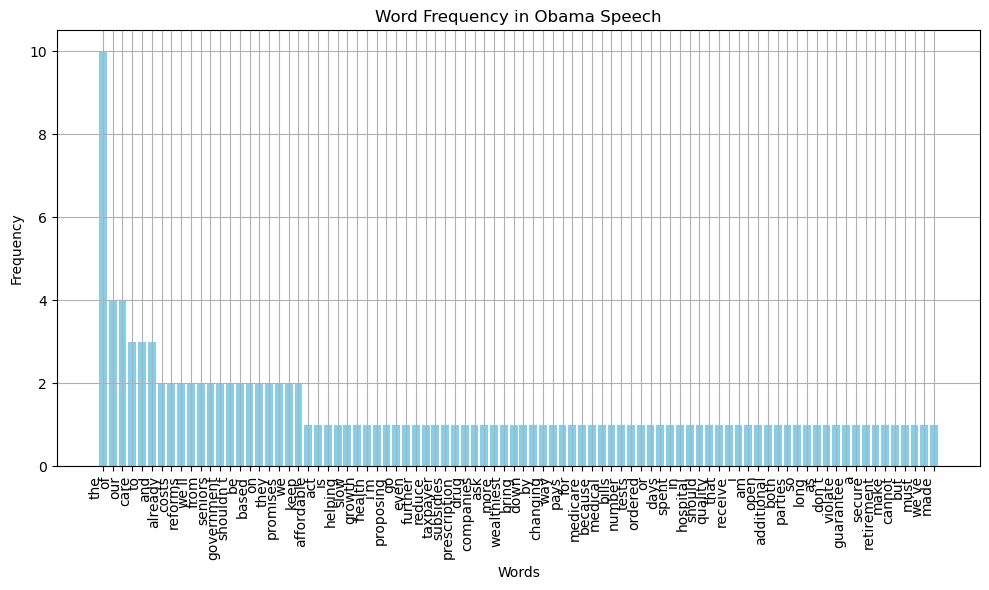

In [10]:
# Now let's visualize the counts
import string
from collections import Counter
import matplotlib.pyplot as plt

# Sample string
speech_text = "Already, the Affordable Care Act is helping to slow the growth of health care costs. And the reforms I’m proposing go even further. We’ll reduce taxpayer subsidies to prescription drug companies and ask more from the wealthiest seniors. We’ll bring down costs by changing the way our government pays for Medicare, because our medical bills shouldn’t be based on the number of tests ordered or days spent in the hospital; they should be based on the quality of care that our seniors receive. And I am open to additional reforms from both parties, so long as they don’t violate the guarantee of a secure retirement. Our government shouldn’t make promises we cannot keep but we must keep the promises we’ve already made."

# Remove punctuation and split into words
translator = str.maketrans("", "", string.punctuation)
speech_text_no_punctuation = speech_text.translate(translator)
words = speech_text_no_punctuation.lower().split()

# Count the occurrences of each word
word_counts = Counter(words)

# Sort words by frequency in descending order
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Extract words and counts for plotting
labels, counts = zip(*sorted_words)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency in Obama Speech')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.grid()
plt.show()


### Significance

A couple of things jump out at us. First and foremost, it's kind of hard to read. I mean we have the words there and the height of the bars reflect the number of times a given word was found. We might consider rotating the axes for greater legibility but we'll get to that in a moment. 


Ultimately wewe might ponder the significance of the above words and try to assign some meta meaning to the frequency of a given word. For example, the word "the" shows up a lot as does "of" and "our". The word "care" is also mentioned a few times. Does this mean anything? 

Well, the word "the" is an article and in-and-of-itself doesn't really add to any deeper understanding of the overall text. So we might discard it or eliminate it from later consideration. We call these "stop words" in NLP parlance. In fact, there is an idea in NLP that the fewer times a word shows up might mean that that word is interesting in some way. There are formal ways to measure that but let's just stick with this example for now. 

## Lemmatization

Uh oh. This sounds weird doesn't it? What do we mean by this? Well, the concept is easy but it's important to understand some background first. I think that everybody can easily relate to the idea that the following word apirs are referring to the same concepts. If we take the word on the left and reduce it to its most basic *valid* we have performed **lemmatization**. 

```
Surfing   -> Surf
Running   -> Run
Proposing -> Propose
Reforms   -> Reform
```

Why do we care to do this? Well let's see what happens if we do this to the Obama Speech text. 

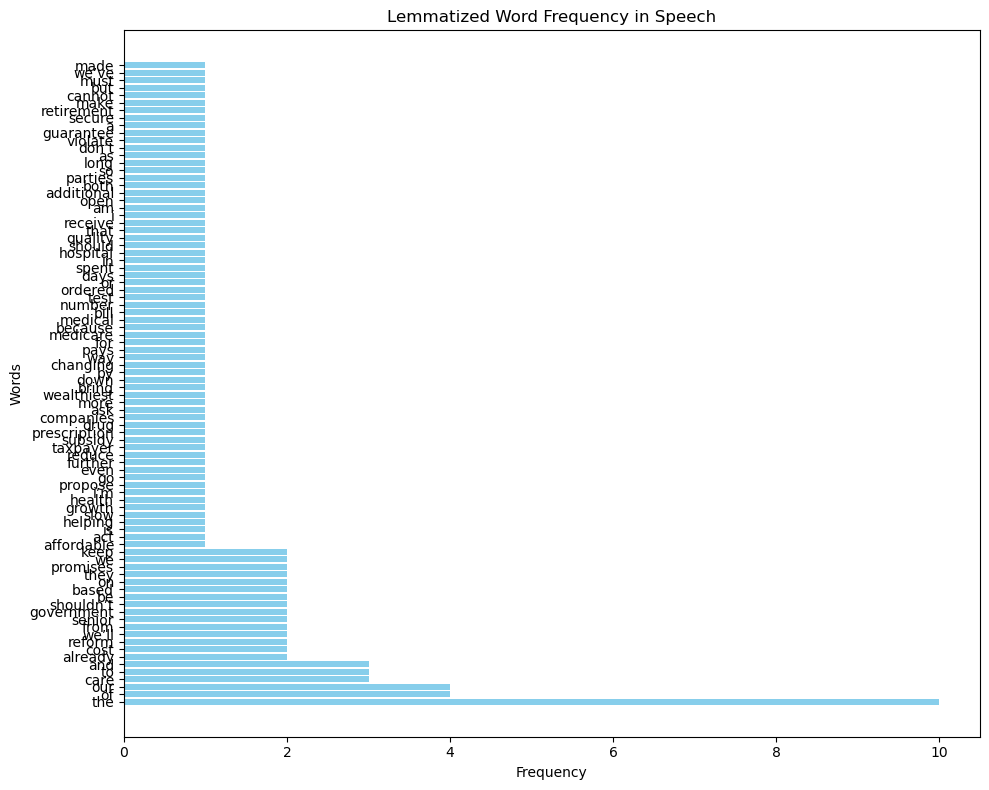

In [11]:
import string
from collections import Counter
import matplotlib.pyplot as plt

def simple_lemmatize(word):
    lemmatization_dict = {
        'proposing': 'propose',
        'reforms': 'reform',
        'reduce': 'reduce',
        'subsidies': 'subsidy',
        'costs' : 'cost',
        'seniors' : 'senior',
        'bills': 'bill',
        'tests' : 'test'
        # Add more mappings as needed
    }
    return lemmatization_dict.get(word, word)


# Sample string
speech_text = "Already, the Affordable Care Act is helping to slow the growth of health care costs. And the reforms I’m proposing go even further. We’ll reduce taxpayer subsidies to prescription drug companies and ask more from the wealthiest seniors. We’ll bring down costs by changing the way our government pays for Medicare, because our medical bills shouldn’t be based on the number of tests ordered or days spent in the hospital; they should be based on the quality of care that our seniors receive. And I am open to additional reforms from both parties, so long as they don’t violate the guarantee of a secure retirement. Our government shouldn’t make promises we cannot keep but we must keep the promises we’ve already made."

# Remove punctuation and split into words
translator = str.maketrans("", "", string.punctuation)
speech_text_no_punctuation = speech_text.translate(translator)
words = speech_text_no_punctuation.lower().split()


# Lemmatize words
lemmatized_words = [simple_lemmatize(word) for word in words]

# Count the occurrences of each lemmatized word
word_counts = Counter(lemmatized_words)

# Sort words by frequency in descending order
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Extract words and counts for plotting
labels, counts = zip(*sorted_words)

# Create a horizontal bar chart with lemmatized words
plt.figure(figsize=(10, 8))
plt.barh(labels, counts, color='skyblue', height=0.8)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Lemmatized Word Frequency in Speech')
plt.tight_layout()
plt.show()

The results aren't immediately obvious because our simple lemmatization approach didn't change many of the words. You could say that by using lemmatization on the text we have reduced or compressed the word space without losing much information. We still have the question as to what do with the repetitive words such as "the" but we'll get to that real soon. 

While this example is pretty basic the idea behind lemmatization was motivated for more complex reasons. Think of Lemmatization as a linguistic process that involves reducing words to their base or root form, known as the lemma. The goal is to simplify different inflected forms of a word to a common base, facilitating the analysis and comprehension of textual data. 

This technique is particularly valuable in natural language processing and text analysis, as it helps identify the essential meaning of words, reducing variations to a standardized and consistent representation. While advanced natural language processing libraries often employ complex algorithms for lemmatization, the basic concept revolves around simplifying words to their most fundamental and meaningful forms for improved understanding and analysis.

### Differences From Stemming

So you might be tempted to think lemmatization is the same as stemming. On the other hand if this is your first foray into NLP then you might have never heard of stemming. It's similar but much different to lemmatization. Here is an example.


Stemming is a text normalization technique that involves reducing words to their "stem" or root form by removing suffixes or prefixes. For instance, the word "proposing" would be stemmed to "propos," and "reforms" would become "reform." Stemming aims to capture the base or root meaning of a word but might not always result in valid words.  

Stemmed Example from the Obama text:

```
proposing -> propos
reforms   -> reform
reduce    -> reduc
```

Lemmatized Example from the Obama text:

```
proposing -> propose
reforms   -> reform
reduce    -> reduce
```

It just so happens that in the case of "reforms" that the result would be the same as when applying lemmatization. But consider that lemmatization transforms words to their base or root form though ensures that the resulting word is a valid word in the language. It involves considering the context of the word to produce a meaningful representation. 

You might be tempted to think that **stemming** is somehow inferior when it isn't especially when considering applications such as spell check programs or google searches using misspelled or shortened words. In these cases having access to the **stemmed** versions of words is more useful because they are more general. 

Humans understand the **lemmatized** version but we can also probably understand the **stemmed** version too. Still, if we are typing someting and make a mistake the spell check with look at the suspicious word and compare to known stems and then suggest a correction. 

It might also be useful to have stemmed versions of words when looking at lexical clusters because it makes any resulting visualization easier to understand. Such was the case with out plot above (though we were using lemmatization).

So dont' hate on stemming (not that you were) because it has a place in NLP.

## Stop Words

The concept of stop words in natural language processing (NLP) originates from the idea that certain words occur frequently in a language but often carry little semantic meaning. These words are considered common and generic, appearing in various contexts without providing significant insights into the content of the text. 

Examples of stop words include articles (e.g., "the," "a," "an"), prepositions (e.g., "in," "on," "at"), conjunctions (e.g., "and," "but," "or"), and common pronouns (e.g., "I," "you," "he," "she"). The rationale behind removing stop words during text preprocessing includes the ideas that by excluding common words the remaining words are more likely to represent the core semantic content. Also, by removing the words, we have fewer words to consider in downstream NLP tasks that could be computationally problematic if we have millions of words to consider. Our example is quite small and trival for purposes of education.

Removing stop words helps reduce noise in the data and can improve the efficiency of natural language processing tasks. So we might think about how to eliminate the "noise" from the Obama text. 

So the resulting plot is still kind of messy but we've at least got meaningful words on the axes.

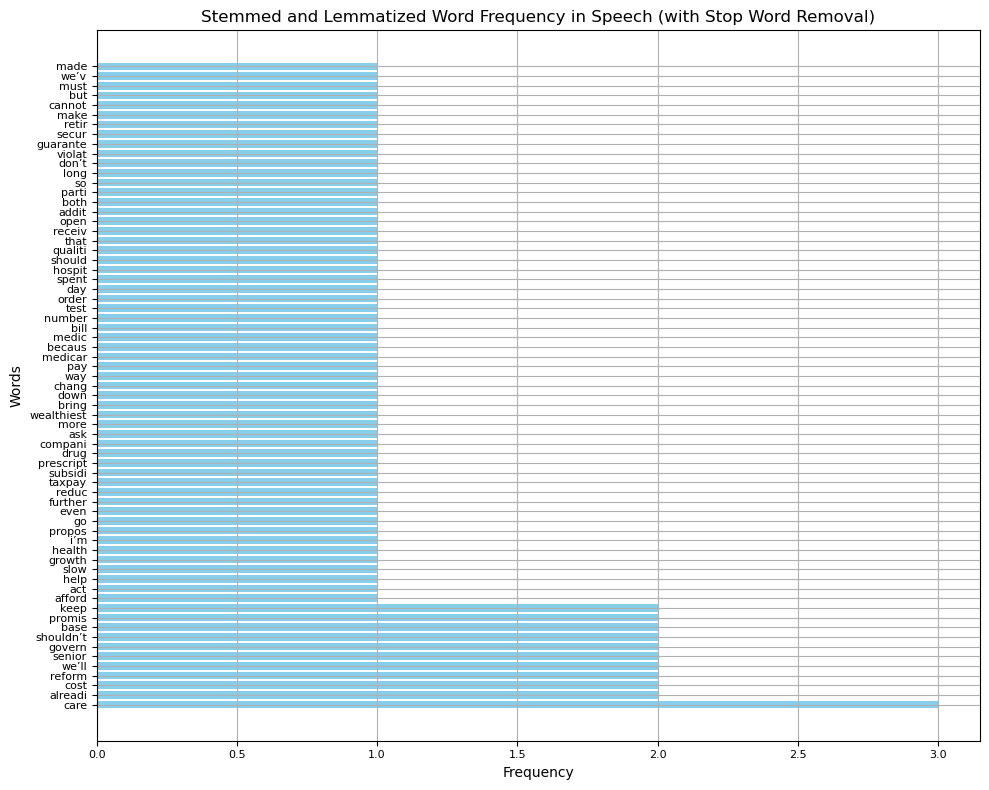

In [12]:
import string
from collections import Counter
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer

def simple_stem(word):
    stemmer = PorterStemmer()
    return stemmer.stem(word)

def simple_lemmatize(word):
    lemmatization_dict = {
        'proposing': 'propose',
        'reforms': 'reform',
        'reduce': 'reduce',
        'subsidies': 'subsidy',
        # Add more mappings as needed
    }
    return lemmatization_dict.get(word, word)

# Sample string
speech_text = "Already, the Affordable Care Act is helping to slow the growth of health care costs. And the reforms I’m proposing go even further. We’ll reduce taxpayer subsidies to prescription drug companies and ask more from the wealthiest seniors. We’ll bring down costs by changing the way our government pays for Medicare, because our medical bills shouldn’t be based on the number of tests ordered or days spent in the hospital; they should be based on the quality of care that our seniors receive. And I am open to additional reforms from both parties, so long as they don’t violate the guarantee of a secure retirement. Our government shouldn’t make promises we cannot keep but we must keep the promises we’ve already made."

# Remove punctuation and split into words
translator = str.maketrans("", "", string.punctuation)
speech_text_no_punctuation = speech_text.translate(translator)
words = speech_text_no_punctuation.lower().split()

# Stem words
stemmed_words = [simple_stem(word) for word in words]

# Lemmatize stemmed words
lemmatized_words = [simple_lemmatize(word) for word in stemmed_words]

# Define stop words
stop_words = set([
    'a','or','as','i','by','be', 'the', 'and', 'to', 'of', 'on', 'or','in', 'we', 'll', 'for', 'is', 'am', 'from','are', 'you', 'he', 'she', 'it', 'they', 'my', 'your', 'his', 'her', 'our', 'their'
    # Add more stop words as needed
])

# Remove stop words
filtered_words = [word for word in lemmatized_words if word not in stop_words]

# Count the occurrences of each word after stemming and lemmatization
word_counts = Counter(filtered_words)

# Sort words by frequency in descending order
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Extract words and counts for plotting
labels, counts = zip(*sorted_words)

# Create a horizontal bar chart with lemmatized words after stop word removal
plt.figure(figsize=(10, 8))
plt.barh(labels, counts, color='skyblue', height=0.8)
plt.xlabel('Frequency')
plt.ylabel('Words')

plt.xticks(fontsize=8)  # Set font size for x-axis labels
plt.yticks(fontsize=8)  # Set font size for y-axis labels

plt.title('Stemmed and Lemmatized Word Frequency in Speech (with Stop Word Removal)')
plt.grid()
plt.tight_layout()
plt.show()


## Term Frequency - Inverse Document Frequency

TF-IDF, which stands for Term Frequency-Inverse Document Frequency, is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents or a corpus. TF-IDF is widely used in natural language processing and information retrieval for various text analysis tasks. 

### TDM vs TF-IDF 

We typically use what we call "Term Document Matrices" to digitally represent what words might appear in a boyd of text. For example if we have a list of text messages that express opinions about a movie we could consider each text messages as a "Document" and each word in each "Document" as a word that might (or not) be unique to that Document. The format of the TDM is simple. Each row represents a Document and the columns are all teh unique words across ALL documents. If the numeral one appears at the intersection of a row and column it means that word shows up in that document. If a zero appears at the intersection it means the word does NOT appear.

At the most basic level, organizaing text in such a matrix provides a way to count what words exist and how many times they show up across all Documents. We can also see what words might be unique to a given Document in which case there might be something interesting about that Document. This is all very important if we wanted to build a model, for example, to predict whether a message / Document represents a positive statement about the movie in question. This also assumes that whmever asked the question about the movie has also asked the provider of the message to definitely label their message / Document as being "positive" or "negative". This will form the basis of some data on which to train say a Logistic Regression model.

Technically we can build a model with just the TDM and, in fact, it's a quick way to get started with a possible proediction engine. That said, we might also consider using some of the text cleaning technqiues we've discussed above to reduce the number of words to consider. We might also remove stop words to make the resilting messages "cleaner" and devoid of "junk words" that might not contribute meaning. That's generally a good thing to do but again technically we don't have to do that. 

### TF-IDF

The idea of TDM is a natural bridge to the Term Frequence - Inverse Document Frequency matrix. They both will look very similar in that the rows are the same Documents as in the TDM as are the columns. It's the numeric values found at the intersection of rows and columns that will differ. 

So, common terms that appear in many documents may not contribute much to the understanding of the content. TF-IDF helps in reducing the impact of such terms. Such words have lower TF-IDF values. Note that we can compute a TF-IDF directly from a set of Documents - we don't need to first compute a TDM although under-the hood the process for computing a TD-IDF will pretty much compute its own versio of a TDM and build on it. 

The **Term Frequency** measures the frequency of a word in a document. It indicates how often a specific word appears within the document. A high TF values suggest that a word is frequently used within the document. Let's assume for the moment that we have only one document. The scale of TF is 0 to 1. In the formula, the variable **d** represents a single **document** in a larger body or **corpus** of documents.

$$ \text{TF}(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d} \$$

The **Inverse Document Frequency** (IDF) measures the rarity or uniqueness of a word across a collection of documents (corpus). Words that are common across many documents have lower IDF values, while words that are unique to a specific document have higher IDF values. In this case **D** represents a body or **corpus** of one or more documents.

$$ \text{IDF}(t, D) = \ln\left(\frac{\text{Total number of documents in } D}{\text{Number of documents containing term } t}\right) + 1 $$

The scale of IDF (Inverse Document Frequency) is logarithmic. The natural logarithmic scaling is applied to ensure that terms that appear in a relatively small number of documents are given more weight compared to terms that appear in a larger number of documents. The use of logarithm helps in emphasizing the impact of rare terms on the overall TF-IDF score. The addition of 1 in the denominator is a smoothing term to prevent division by zero when a term appears in every document.

The **TF-IDF** Score is the product of TF and IDF. It combines local (within the document) and global (across the corpus D) information about a word. Words with high TF-IDF scores are those that are both frequent within a document and unique to that document. In our case we really have only one document.

$$ \text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D) $$

- t is the term (word)
- d is the document
- D is the entire corpus (collection of documents)
- TF(t,d) is the Term Frequency of t in d
- IDF(t,D) is the Inverse Document Frequency of t in D


A *high TF-IDF* score indicates that a word is important and relevant to a specific document

A *low TF-IDF* score suggests that a word is common and does not provide much discriminatory information about the document.

Words with high TF-IDF values are often keywords or terms that distinguish a document from others in the corpus. Once we work woth a larger sert of Documents the value of computing becomes more clear as we can down weight common words appeating across alot of documents and up weight those that don't seem to show up alot except in certain documents. Obviously, or I should say, intutively we can use the above formula to compute a TF-IDF by defining our own function but Python moduels such as scikit-learn have utilities to do just that.

> The advantage of a TF-IDF is that it gives us a better idea od what words are really important (or not).

### scikit TF-IDF 

Let's first put scikit-learn to work in an example Here we'll create a list of some statements that could be Tweets, social media comments, texts from a group chat or just recorded soundbites coming from a street interview. In this case we have labelled information as to if the comment is positive (1) or negative (0). We can use some modules ion scikit to help is build a classifier for future comments about movies. When we work with text data the follow is usuall like this:

First we decide what words exist. Then we decide how to count or weight them so we can ignore unimportant words and find the "gold" or more meaingful words that might be influential in a model

#### Very Basic Example

At this point we'll take the following comments and we’re going to turn text into numbers. First with raw counts (TDM), then with TF-IDF. The guiding idea here is the following:

> A term–document matrix counts words whereas a TF-IDF matrix reweights those counts to emphasize informative terms.

Also just to be clear:

- TDM and TF-IDFs are representations, not libraries.

- NLTK, spaCy, and scikit-learn can all produce these representations.

So the following modules will do the following though there are frequnetly many ways to do the same thing:

- CountVectorizer (skelearn) creates TDM

- TfidfVectorizer (sklearn) creates TF-IDF

- NLTK / spaCy are tools for tokenization, lemmatization, preprocessing BUT 

- Vectorization will happens after text preprocessing BUT strictly speaking you do not need to preprocessing first but it helps.

In [ ]:
texts = [
    "I love this movie",
    "I hate this movie",
    "This movie is great"
]

The following will generate a Term–Document Matrix (TDM). You might sometimes hear Document-Term Matrix where the axes are flipped. Here is how to interpret what it is you will see.

1) It's a matrix
 
2) Each row = document which in our case will be a comment from someone about a movie

3) Each column = word. So if you see a "1" in the column it means that word appears in a given document. "0" means it does not

4) Values = raw counts. You could add  up each column and row.

What we see here is that common words like “movie” dominate which is not surprising. We might consider first cleaning or removing stop words from these messages but this example is instructive as to how big a matrix can get with just a few statements. Imagine if we had asked 100 or 1,000 people for their comments on the movie in question!

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

count_vec = CountVectorizer()
X_counts = count_vec.fit_transform(texts)

tdm = pd.DataFrame(
    X_counts.toarray(),
    columns=count_vec.get_feature_names_out(),
    index=[f"Doc {i+1}" for i in range(len(texts))]
)

tdm


,acting,amazing,and,best,every,film,great,hated,have,loved,...,movie,of,seen,story,terrible,the,this,was,worst,year
Doc 1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
Doc 2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
Doc 3,1,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Doc 4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc 5,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
Doc 6,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1


**Interpreting the Term–Document Matrix (TDM)**

In a term–document matrix, each row represents a document and each column represents a word from the vocabulary, with values indicating how many times that word appears in the document. A value of zero means the word does not occur in that document, while larger integers reflect higher frequency. Unlike TF-IDF, these values are raw counts and are not normalized or adjusted for how common a word is across the corpus. 

As a result, frequently occurring words—such as “movie” or “this”—can dominate the representation even if they carry little semantic or predictive value. The TDM provides a straightforward numerical encoding of text, but it treats all words as equally important regardless of how informative they are.

Next up let's generate the TF-IDF which gives us ideas about what words might be important across all documetns (comments).

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer()
X_tfidf = tfidf_vec.fit_transform(texts)

tfidf_df = pd.DataFrame(
    X_tfidf.toarray(),
    columns=tfidf_vec.get_feature_names_out(),
    index=[f"Doc {i+1}" for i in range(len(texts))]
)

tfidf_df.round(3)


,acting,amazing,and,best,every,film,great,hated,have,loved,...,movie,of,seen,story,terrible,the,this,was,worst,year
Doc 1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.653,...,0.536,0.000,0.000,0.000,0.000,0.000,0.536,0.000,0.000,0.000
Doc 2,0.000,0.000,0.000,0.000,0.000,0.448,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.547,0.000,0.448,0.547,0.000,0.000
Doc 3,0.447,0.447,0.447,0.000,0.000,0.000,0.447,0.000,0.000,0.000,...,0.000,0.000,0.000,0.447,0.000,0.000,0.000,0.000,0.000,0.000
Doc 4,0.000,0.000,0.000,0.000,0.577,0.000,0.000,0.577,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Doc 5,0.000,0.000,0.000,0.522,0.000,0.000,0.000,0.000,0.522,0.000,...,0.428,0.000,0.522,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Doc 6,0.000,0.000,0.000,0.000,0.000,0.379,0.000,0.000,0.000,0.000,...,0.000,0.463,0.000,0.000,0.000,0.463,0.000,0.000,0.463,0.463


**Interpreting TF-IDF values**

In a TF-IDF matrix, a value of zero simply means that a word does not appear in a particular document. Non-zero values indicate how prominent a word is within that document, relative to the other words it contains. These values are not on an absolute or probabilistic scale; instead, they are normalized so that each document vector has a fixed length. 

As a result, a value such as 0.536 does not mean a word is globally important or predictive on its own—it only means that the word contributes a relatively large share of that document’s representation. 

Whether a word is actually useful for prediction is determined later by the machine-learning model (e.g., logistic regression), which learns separate coefficients that reflect how informative each word is for the task at hand.

You should notice that the two matrices share the same rows and columns but they have different values. Words like "movie" and "this" have lower weights because they occur more frequently across all documents. Contrast this with words like "love","hate", and "great" which have higher weights are they don't occur as much ACROSS all documents - only within them. 

**This is the *inverse document frequency effect**

#### Single Pass Model

Each **row** in the list represents one **document** (X) and is associated with one outcome label (y).

In [40]:
texts = [
    "I loved this movie",
    "This film was terrible",
    "Amazing acting and great story",
    "I hated every minute",
    "Best movie I have seen",
    "Worst film of the year"
]

labels = [1, 0, 1, 0, 1, 0]  # 1 = positive, 0 = negative


We'll split the data into a training and testing pair. Our data is quite small but this is just for the purposes of demonstration.

Then we'll create a **vectorizer** object that we can then use to fit and transform the **X_train** data. Then we need to simply (and only) **transform** the test_data. Note that if we also **fit** the test data then we are effectively dumping the training elements that were fit on the training data.

We then fit a Logistic Regression model and then do predictions for the training data followed by a single prrediction on the test data. 

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer     # <- Here is the tool to create a TF-IDF
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data (one round, not cross-validation)
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.33, random_state=42, stratify=labels
)

# Prin tou the texts and their respective label (1 or 0)
print("TRAIN TEXTS:")
for t, y in zip(X_train, y_train):
    print(f"  y={y}  | {t}")

print("\nTEST TEXTS:")
for t, y in zip(X_test, y_test):
    print(f"  y={y}  | {t}")


# So - 1) Fit TF-IDF ONLY on training data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

# 2) Transform the test data using the training vocabulary
X_test_tfidf = vectorizer.transform(X_test)

# 3) Train the model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)

# 4) Predict on the test set
y_pred = clf.predict(X_test_tfidf)

print("\nTest accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))


TRAIN TEXTS:
  y=0  | I hated every minute
  y=1  | Best movie I have seen
  y=0  | This film was terrible
  y=1  | Amazing acting and great story

TEST TEXTS:
  y=1  | I loved this movie
  y=0  | Worst film of the year

Test accuracy: 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [42]:
single_text = X_test[1]  # or: "'Worst film of the year'"

single_vec = vectorizer.transform([single_text])
pred = clf.predict(single_vec)[0]
proba = clf.predict_proba(single_vec)[0]  # [P(0), P(1)]

print("Text:", single_text)
print("Predicted label:", pred, "(1=positive, 0=negative)")
print(f"Prob negative: {proba[0]:.3f}, Prob positive: {proba[1]:.3f}")

Text: Worst film of the year
Predicted label: 0 (1=positive, 0=negative)
Prob negative: 0.550, Prob positive: 0.450


#### Cross Fold Validation

Cross-fold validation helps us estimate test-set performance by repeatedly training and evaluating models on different splits of the data. The models trained inside the folds are temporary and are not intended to be saved or deployed.

> Cross-validation answers the question of How good is this approach? Final training will actually give us the model.

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", LogisticRegression(max_iter=1000))
])

scores = cross_val_score(
    pipeline,
    texts,
    labels,
    cv=3,
    scoring="accuracy"
)

for i, score in enumerate(scores, start=1):
    print(f"Fold {i} accuracy: {score:.3f}")

print(f"\nMean cross-validated accuracy: {np.mean(scores):.3f}")


Fold 1 accuracy: 1.000
Fold 2 accuracy: 0.500
Fold 3 accuracy: 1.000

Mean cross-validated accuracy: 0.833


If we want a final model to work with then we have to a little more 

In [44]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(
    pipeline,
    texts,
    labels,
    cv=3,
    scoring="accuracy",
    return_estimator=True     # <- We didn't do this before - this gives us a final model
)

fold_model = cv_results["estimator"][0]
fold_model.predict(["I loved the acting"])


array([0])

So with the above code which implements a form of stop word cleaning in addition to the stemming and lemmatization. Note that the stemming does not impart a particularly useful dimension to the plot. This was more of a demonstration of what it would do. We would use stemming as a precursor to other activities involving unsupervised methods such as clustering. 

# Python Libraries for NLP

Natural Language Processing (NLP) libraries in Python play a big role in unlocking the potential of human language for computational analysis and understanding. Two widely used libraries, [NLTK](https://www.nltk.org/) (Natural Language Toolkit) and spaCy, stand out for their distinct features and capabilities. Before we look at those we can also leverage scikit-learn which you already know

## NLTK 

NLTK (Natural Language Processing Tookit) is often regarded as a standard library in NLP, aims to be a comprehensive toolkit for working with human language data. It has a robust set of tools includes modules for tokenization, stemming, tagging, parsing, and more. NLTK empowers developers and researchers to explore and implement various NLP techniques. 

## spaCy

On the other hand, [spaCy](https://spacy.io/) is recognized for its efficiency and speed, catering to industrial-strength natural language processing needs. This library is designed with a focus on production-level performance, making it an excellent choice for applications demanding real-time processing and large-scale text analysis. SpaCy excels in tasks like named entity recognition, part-of-speech tagging, and dependency parsing, providing a streamlined approach to NLP workflows.


# Applying NLTK

So let's replace some of previous work with methods from NLTK. The advantage of this approach is that we don't have to write our own code to get things done here. Note that we will use NLTK here to do cleanup and count some words for a frequency bar plot.

We won'f compute TF-IDF since it is a corpus-level statistic and is only meaningful when comparing multiple documents. With a single document, inverse document frequency provides no useful information and TF-IDF effectively collapses to term frequency. For this reason, we omit TF-IDF in the single-document example and focus on TF instead.

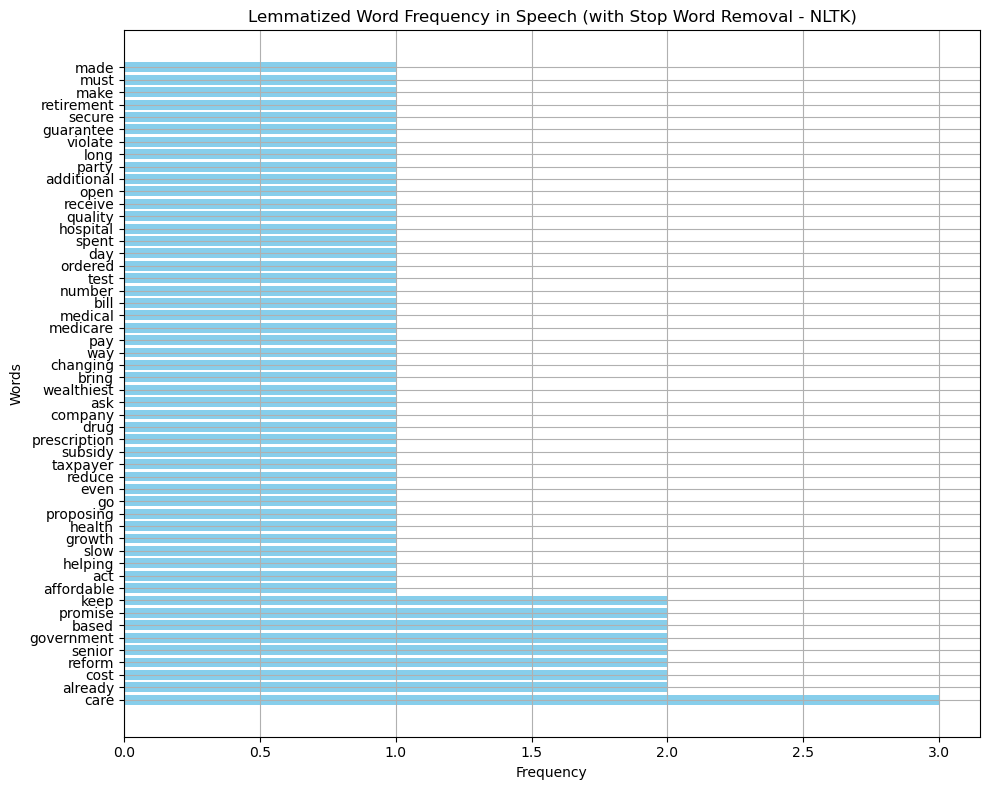

In [56]:
import string
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Sample string
speech_text = "Already, the Affordable Care Act is helping to slow the growth of health care costs. And the reforms I’m proposing go even further. We’ll reduce taxpayer subsidies to prescription drug companies and ask more from the wealthiest seniors. We’ll bring down costs by changing the way our government pays for Medicare, because our medical bills shouldn’t be based on the number of tests ordered or days spent in the hospital; they should be based on the quality of care that our seniors receive. And I am open to additional reforms from both parties, so long as they don’t violate the guarantee of a secure retirement. Our government shouldn’t make promises we cannot keep but we must keep the promises we’ve already made."

# Tokenize words using NLTK
words = word_tokenize(speech_text)

# Remove punctuation using NLTK
translator = str.maketrans("", "", string.punctuation)
words_no_punctuation = [word.translate(translator) for word in words if word.isalpha()]

# Lemmatize words using WordNetLemmatizer from NLTK
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in words_no_punctuation]

# Define NLTK stop words - this is a much large set of stop words
stop_words = set(stopwords.words('english'))

# Remove stop words
filtered_words = [word for word in lemmatized_words if word not in stop_words]

# Calculate word frequencies using FreqDist
word_freq = FreqDist(filtered_words)

# Sort words by frequency in descending order
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Extract words and counts for plotting
labels, counts = zip(*sorted_words)

# Create a horizontal bar chart with lemmatized words after stop word removal using NLTK
plt.figure(figsize=(10, 8))
plt.barh(labels, counts, color='skyblue', height=0.8)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Lemmatized Word Frequency in Speech (with Stop Word Removal - NLTK)')
plt.grid()
plt.tight_layout()
plt.show()


### Better TF-IDF Example

Because those reslts weren't very dramatic, let's come up with a different example. We will have three documents in a list. None of the documents are very long but we are just trying to point out some things here about the TF-IDF. Look at the elements of the document list and see what words in each of the three elements are unique to that document and what words are not unique to that document. Now we'll compute the TF-IDF for each word in each document. But, we'll do that only after we have cleaned up the documents.

In [59]:
import string
import pandas as pd

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

# Run once if needed:
# nltk.download("punkt")
# nltk.download("stopwords")
# nltk.download("wordnet")

documents = [
    "The quick brown fox jumps over the lazy dog. Foxes are fast. Foxes are cool. Foxes are noisy. I like foxes.",
    "A journey of a thousand miles begins with a single step. Sometimes a trip to the store is a journey.",
    "To be or not to be, that is the question. That question is from Shakespeare."
]

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
translator = str.maketrans("", "", string.punctuation)

def cleaner_tokenizer(text: str):
    tokens = word_tokenize(text)
    tokens = [t.translate(translator) for t in tokens if t.isalpha()]   # remove punctuation + keep words
    tokens = [t.lower() for t in tokens if t.lower() not in stop_words] # lowercase + remove stopwords
    tokens = [lemmatizer.lemmatize(t) for t in tokens]                  # lemmatize
    return tokens

vectorizer = TfidfVectorizer(
    tokenizer=cleaner_tokenizer,
    lowercase=False,     # we already lowercase in the tokenizer
    token_pattern=None   # required when providing a custom tokenizer
)

X = vectorizer.fit_transform(documents)

tfidf_df = pd.DataFrame(
    X.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=[f"Doc {i+1}" for i in range(len(documents))]
)

# Show the TF-IDF matrix (rounded for readability)
tfidf_df.round(3)


,begin,brown,cool,dog,fast,fox,journey,jump,lazy,like,...,noisy,question,quick,shakespeare,single,sometimes,step,store,thousand,trip
Doc 1,0.000,0.171,0.171,0.171,0.171,0.857,0.000,0.171,0.171,0.171,...,0.171,0.000,0.171,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Doc 2,0.289,0.000,0.000,0.000,0.000,0.000,0.577,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.289,0.289,0.289,0.289,0.289,0.289
Doc 3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.894,0.000,0.447,0.000,0.000,0.000,0.000,0.000,0.000


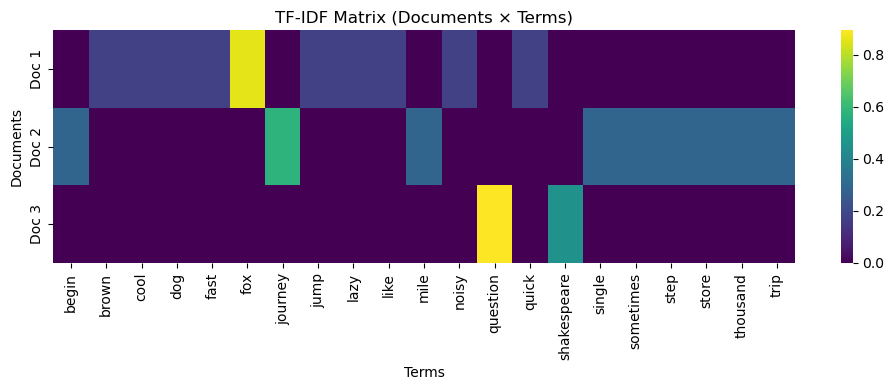

In [60]:
# This is the numeric representation that machine-learning models actually see.

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.heatmap(
    tfidf_df,
    cmap="viridis",
    cbar=True
)
plt.title("TF-IDF Matrix (Documents × Terms)")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.tight_layout()
plt.show()


Each row represents a document and each column a term; darker colors indicate higher TF-IDF weights, highlighting which words are most distinctive within each document.
Because TF-IDF vectors are normalized per document, color intensities should be interpreted row-wise rather than compared directly across rows.

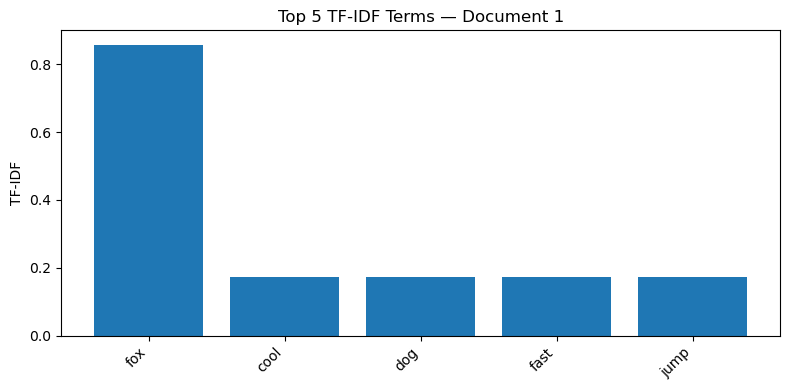

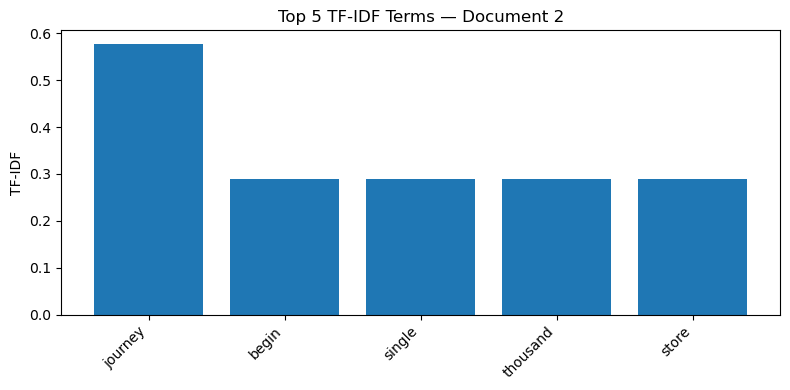

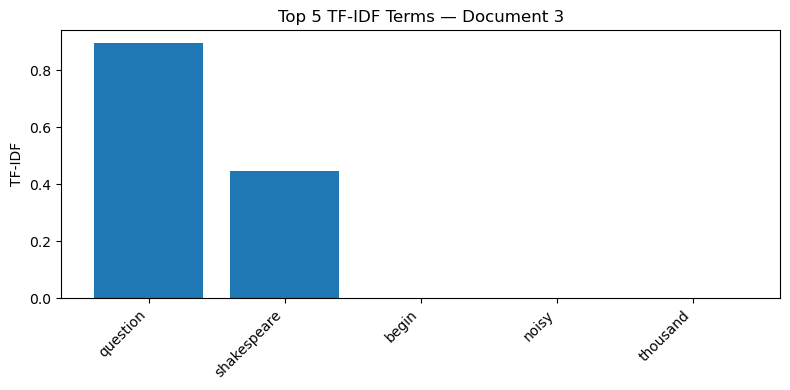

In [61]:
top_k = 5

for i in range(tfidf_df.shape[0]):
    top = tfidf_df.iloc[i].sort_values(ascending=False).head(top_k)

    plt.figure(figsize=(8, 4))
    plt.bar(top.index, top.values)
    plt.title(f"Top {top_k} TF-IDF Terms — Document {i+1}")
    plt.ylabel("TF-IDF")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


TF-IDF bar heights indicate relative word importance within a document, not absolute importance across different documents. TF-IDF values are normalized per document, so bar heights should be interpreted within each document rather than compared across documents.

When visualizing TF-IDF values as bar plots for individual documents, the height of each bar in the bar plot should be interpreted within the context of that document only. Taller bars indicate words that contribute more to that document’s representation relative to the other words it contains, while shorter bars represent less dominant—but still informative—terms. A value of zero (not shown) simply means the word does not appear in the document. In this sense, TF-IDF highlights which words are most distinctive or influential within a given document.

Because TF-IDF vectors are typically normalized independently for each document, the absolute scale of the values differs across documents. As a result, TF-IDF bar heights should not be compared directly between documents. A smaller TF-IDF value in one document does not imply that a word is less important than a larger value in another document; each value is relative to its own document’s internal distribution of terms. 

Comparisons across documents are instead made using the full TF-IDF vectors—such as through **cosine similarity** or dimensionality-reduction techniques—rather than by comparing individual word weights.

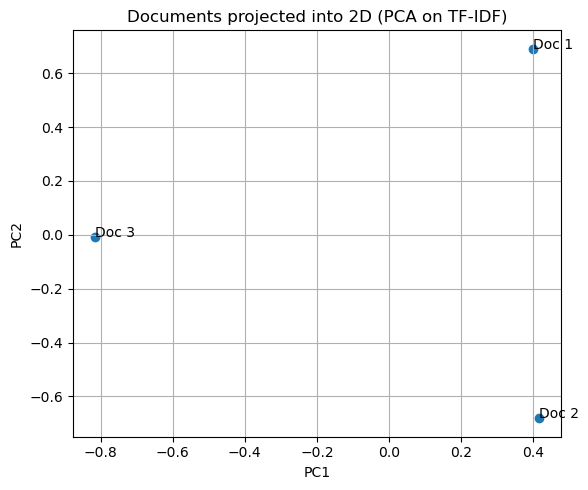

In [65]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2d = pca.fit_transform(tfidf_df.values)

plt.figure(figsize=(6, 5))
plt.scatter(X_2d[:, 0], X_2d[:, 1])

for i, label in enumerate(tfidf_df.index):
    plt.text(X_2d[i, 0], X_2d[i, 1], label)

plt.title("Documents projected into 2D (PCA on TF-IDF)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.grid()
plt.show()


### Better Obama Example

So let's use more text from Obama's speech. We'll use three paragraphs from an Obama speech. We'll consider each paragraph to be a separate document.

```
Now is our best chance for bipartisan, comprehensive tax reform that encourages job creation and helps bring down the deficit. We can get this done.  The American people deserve a tax code that helps small businesses spend less time filling out complicated forms, and more time expanding and hiring a tax code that ensures billionaires with high-powered accountants can’t work the system and pay a lower rate than their hardworking secretaries; a tax code that lowers incentives to move jobs overseas, and lowers tax rates for businesses and manufacturers that are creating jobs right here in the United States of America.  That’s what tax reform can deliver.  That’s what we can do together. 

Tonight, thanks to the grit and determination of the American people, there is much progress to report.  After a decade of grinding war, our brave men and women in uniform are coming home.  After years of grueling recession, our businesses have created over six million new jobs.  We buy more American cars than we have in five years, and less foreign oil than we have in twenty years.  Our housing market is healing, our stock market is rebounding, and consumers, patients, and homeowners enjoy stronger protections than ever before. 

But we can’t ask senior citizens and working families to shoulder the entire burden of deficit reduction while asking nothing more from the wealthiest and the most powerful. We won’t grow the middle class simply by shifting the cost of health care or college onto families that are already struggling, or by forcing communities to lay off more teachers and more cops and more firefighters. Most Americans ,Democrats, Republicans, and independents  will understand that we can’t just cut our way to prosperity. They know that broad-based economic growth requires a balanced approach to deficit reduction, with spending cuts and revenue, and with everybody doing their fair share.  And that’s the approach I offer tonight.  On Medicare, I’m prepared to enact reforms that will achieve the same amount of health care savings by the beginning of the next decade as the reforms proposed by the bipartisan Simpson-Bowles commission. 

```

What's important is that 

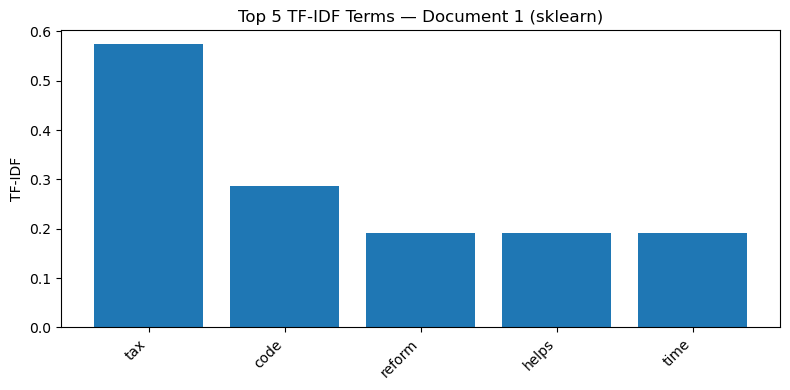

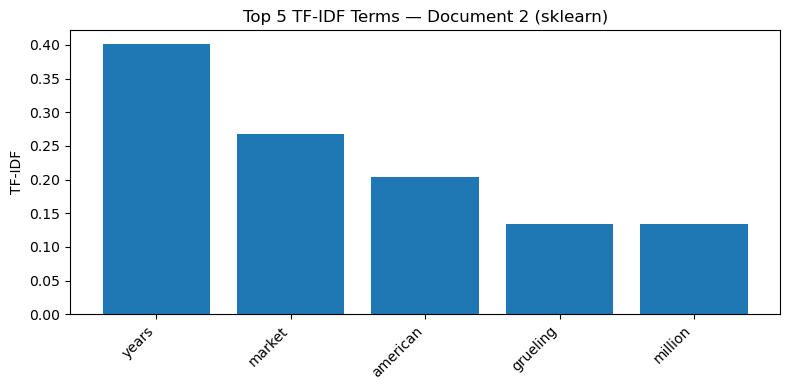

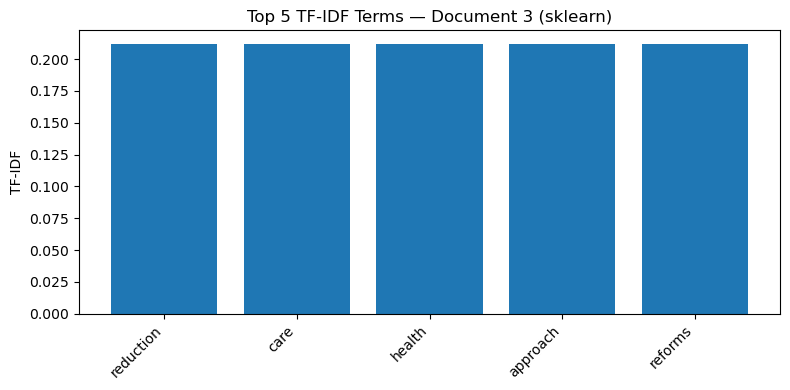

In [63]:
import re
import matplotlib.pyplot as plt
import pandas as pd

import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

# Run once if needed:
# nltk.download("stopwords")

documents = [
    "Now is our best chance for bipartisan, comprehensive tax reform that encourages job creation and helps bring down the deficit. We can get this done.  The American people deserve a tax code that helps small businesses spend less time filling out complicated forms, and more time expanding and hiring a tax code that ensures billionaires with high-powered accountants can’t work the system and pay a lower rate than their hardworking secretaries; a tax code that lowers incentives to move jobs overseas, and lowers tax rates for businesses and manufacturers that are creating jobs right here in the United States of America.  That’s what tax reform can deliver.  That’s what we can do together.",
    "Tonight, thanks to the grit and determination of the American people, there is much progress to report.  After a decade of grinding war, our brave men and women in uniform are coming home.  After years of grueling recession, our businesses have created over six million new jobs.  We buy more American cars than we have in five years, and less foreign oil than we have in twenty years.  Our housing market is healing, our stock market is rebounding, and consumers, patients, and homeowners enjoy stronger protections than ever before.",
    "But we can’t ask senior citizens and working families to shoulder the entire burden of deficit reduction while asking nothing more from the wealthiest and the most powerful. We won’t grow the middle class simply by shifting the cost of health care or college onto families that are already struggling, or by forcing communities to lay off more teachers and more cops and more firefighters. Most Americans ,Democrats, Republicans, and independents  will understand that we can’t just cut our way to prosperity. They know that broad-based economic growth requires a balanced approach to deficit reduction, with spending cuts and revenue, and with everybody doing their fair share.  And that’s the approach I offer tonight.  On Medicare, I’m prepared to enact reforms that will achieve the same amount of health care savings by the beginning of the next decade as the reforms proposed by the bipartisan Simpson-Bowles commission."
]

stop_words = set(stopwords.words("english"))

def cleaner_tokenizer(text: str):
    # Lowercase
    text = text.lower()

    # Keep alphabetic tokens only (removes punctuation and numbers)
    tokens = re.findall(r"[a-z]+", text)

    # Remove stop words
    tokens = [t for t in tokens if t not in stop_words]

    return tokens

vectorizer = TfidfVectorizer(
    tokenizer=cleaner_tokenizer,
    lowercase=False,     # already lowercased
    token_pattern=None   # required when using a custom tokenizer
)

X = vectorizer.fit_transform(documents)

tfidf_df = pd.DataFrame(
    X.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=[f"Doc {i+1}" for i in range(len(documents))]
)

# Plot top TF-IDF terms per document
top_k = 5
for i in range(tfidf_df.shape[0]):
    top = tfidf_df.iloc[i].sort_values(ascending=False).head(top_k)

    plt.figure(figsize=(8, 4))
    plt.bar(top.index, top.values)
    plt.title(f"Top {top_k} TF-IDF Terms — Document {i+1} (sklearn)")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("TF-IDF")
    plt.tight_layout()
    plt.show()


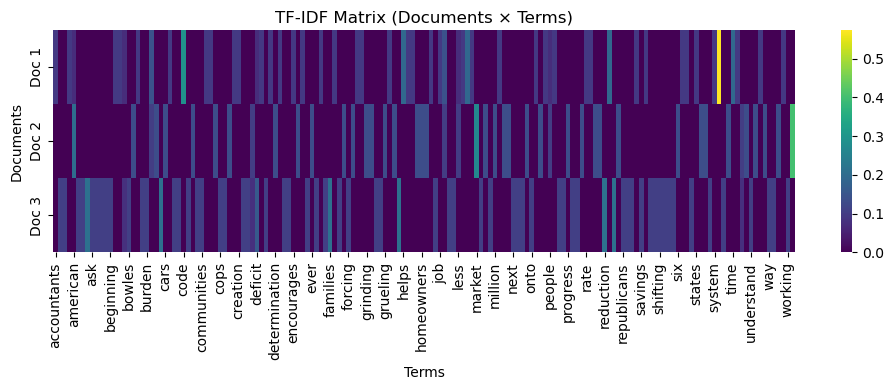

In [66]:
plt.figure(figsize=(10, 4))
sns.heatmap(
    tfidf_df,
    cmap="viridis",
    cbar=True
)
plt.title("TF-IDF Matrix (Documents × Terms)")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.tight_layout()
plt.show()

## Case Study - Enron

So let's look at a real case here. This data set is based on the Enron data which captured emails between Enron executives and whether or not each email related to a bidding process. 
Enron was an American energy company based in Houston, Texas.

If you don't remember or never knew about the Enron scandal then you can [read about it here](https://en.wikipedia.org/wiki/Enron_scandal). It was a very big deal and people working at Enron went to jail. There were lawsuits, bankruptcy declarations and the eventual closure of accounting firms. 

<center><img src="pics/smartestguys.png" width=220 height=220 /></center>

In 2000 to 2001 California experienced power blackouts even though the state has an adequate number of power plants. Enron was believed to have had a role in this as part of a scheme to cause price spikes.

Considerable effort was put into analyzing communications between executives to help with discovery of information which might incriminate or exonerate Enron leadership. The data set became famous and is used in many educational contexts to explain various NLP techniques. The example I present here is drawn from a MIT Edx Course called the ["Analytics Edge"](https://courses.edx.org/).

Let's look at the data. It's actually quite simply organized. The data is available [here](https://raw.githubusercontent.com/steviep42/bios_534/main/data/energy_bids.csv) as a .CSV file. 

There are 856 rows each with two fields. The first field represents a single email text possibly etween Enron leaders. The second field on the same row is a **0 or 1** which corresponds to whether the associated email is "responsive". That is, does it relate to energy schedules or bids? A value of 1 means "yes" and a value of 0 means "no".

Those that are deemed to be **responsive** would then be examined more deeply for possible use by the prosecuting and defense attorneys. We might also try to organize the information into a Term Document Matrix (or a Document Term Matrix) and maybe use a Decision Tree to help us determine if any new email we might uncover is **responsive**.

Let's get our hands dirty with the data and apply some of the things we've learned about previously.

### Get The Dataset

In [109]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import requests


url = "https://raw.githubusercontent.com/steviep42/bios_534/main/data/energy_bids.csv"

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Read the CSV file into a DataFrame
#df = pd.read_csv(url, names=['email', 'response'])
enron_data = pd.read_csv(url)

# Verify the DataFrame
print(enron_data.head())

                                               email  responsive
0  North America's integrated electricity market ...           0
1  FYI -----Original Message----- From: \t"Ginny ...           1
2  14:13:53 Synchronizing Mailbox 'Kean, Steven J...           0
3  ^ ----- Forwarded by Steven J Kean/NA/Enron on...           1
4  ----- Forwarded by Steven J Kean/NA/Enron on 0...           0


### Check the Emails

So the **head** method shows an abbreviated version of the email but some of the emails have many recipients and the email could be of variable length. Our goal here is not to read through each email since we already have labels for those that are responsive but it's helpful for you to see some of them. 

In [110]:
print("Email content for the first 5 rows:")
for i in range(5):
    print(f"Row {i + 1}:")
    print(enron_data['email'].iloc[i][:800])  # Print the first 500 characters of the email
    print()  # Add a blank line for readability

Email content for the first 5 rows:
Row 1:
North America's integrated electricity market requires cooperation on environmental policies Commission for Environmental Cooperation releases working paper on North America's electricity market Montreal, 27 November 2001 -- The North American Commission for Environmental Cooperation (CEC) is releasing a working paper highlighting the trend towards increasing trade, competition and cross-border investment in electricity between Canada, Mexico and the United States. It is hoped that the working paper, Environmental Challenges and Opportunities in the Evolving North American Electricity Market, will stimulate public discussion around a CEC symposium of the same title about the need to coordinate environmental policies trinationally as a North America-wide electricity market develops. The CEC

Row 2:
FYI -----Original Message----- From: 	"Ginny Feliciano" <gfeliciano@earthlink.net>@ENRON [mailto:IMCEANOTES-+22Ginny+20Feliciano+22+20+3Cgfeliciano+

### Check The Label

So let's figure out how many of the emails are responsive and how many are not? We'll quickly see that many are not. That is, our data is not well-balanced which is actually a common problem in supervised learning. We rarely get a balanced data set. There are ways to deal with this but for now, we won't address that.

In [111]:
# Tabulate the counts of 0s and 1s in the "response" column
response_counts = enron_data['responsive'].value_counts()

# Print the tabulated counts
print("Counts of 0s and 1s in the 'responsive' column:")
print(response_counts)

Counts of 0s and 1s in the 'responsive' column:
responsive
0    716
1    139
Name: count, dtype: int64


### Define Our Text Cleaner

In [112]:
## Define Text Pre Processor
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Run once if needed
# nltk.download("stopwords")
# nltk.download("punkt")

stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [
        word.lower()
        for word in tokens
        if word.isalpha() and word.lower() not in stop_words
    ]
    return " ".join(tokens)

enron_data["email"] = enron_data["email"].apply(preprocess_text)

print("Email content for the first 5 rows:")
for i in range(5):
    print(f"Row {i + 1}:")
    print(enron_data["email"].iloc[i][:800])
    print()

Email content for the first 5 rows:
Row 1:
north america integrated electricity market requires cooperation environmental policies commission environmental cooperation releases working paper north america electricity market montreal november north american commission environmental cooperation cec releasing working paper highlighting trend towards increasing trade competition investment electricity canada mexico united states hoped working paper environmental challenges opportunities evolving north american electricity market stimulate public discussion around cec symposium title need coordinate environmental policies trinationally north electricity market develops cec symposium take place san diego november bring together leading experts industry academia ngos governments canada mexico united states consider impact evolving contine

Row 2:
fyi message ginny feliciano gfeliciano enron mailto sent thursday june pm silvia woodard paul runci katrin thomas john riggs kurt yeager gregg ward 

### Create X and y and Associated Training and Test Set

So the data has been cleaned up and normalized. We are now in a position to separate the **enron_data** into **X** (predictors) and **y** the labels that indicate a **responsive** email.  

In [103]:
# Step 1 - Let's create a training and test pair
from sklearn.model_selection import train_test_split

X = enron_data["email"]
y = enron_data["responsive"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train)
print(y_train)

788    fyi works lng guys intended cover release enro...
101    print forwarded jeffrey mark smith enron pm an...
790    please advise whether nevada power company ope...
530    executive summary davis struggles find senate ...
430    jwm jmctarnaghan dasovich jdasovic mbd mday cc...
                             ...                        
71     mike added language item transaction agreement...
106    forwarded jason pm pm cc subject final cuts ga...
270    howard thanks message paper shall hold interna...
435    thoughts enron share analyst meeting please le...
102    forwarded kayne pm mbjohns pm dbjohnso mbnewma...
Name: email, Length: 684, dtype: object
788    0
101    0
790    0
530    1
430    0
      ..
71     0
106    0
270    0
435    1
102    0
Name: responsive, Length: 684, dtype: int64


### Create the TF-IDF

In [113]:
# Step 2 - Let's fit a tfidverctorizer only on the training data
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    min_df=5,
    max_df=0.5,
    max_features=500
)

X_train_tfidf = vectorizer.fit_transform(X_train)

### Transform the Test Data

In [105]:
# Step 3 - Transform (but don't refit) the test data
X_test_tfidf = vectorizer.transform(X_test)

### Train and Evaluate The Model

In [106]:
# Step 4 - Train and Evaluate the Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_tfidf, y_train)

y_pred = clf.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# print out some tree rules
tree_rules = export_text(
    clf,
    feature_names=feature_names,
    max_depth=6
)

print("Decision Tree Rules (First Few Splits):")
print(tree_rules)

Accuracy: 0.80
Decision Tree Rules (First Few Splits):
|--- california <= 0.02
|   |--- demand <= 0.04
|   |   |--- buy <= 0.07
|   |   |   |--- caps <= 0.01
|   |   |   |   |--- iso <= 0.11
|   |   |   |   |   |--- generators <= 0.12
|   |   |   |   |   |   |--- mw <= 0.25
|   |   |   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |   |   |   |--- mw >  0.25
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- generators >  0.12
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- iso >  0.11
|   |   |   |   |   |--- information <= 0.08
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- information >  0.08
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- caps >  0.01
|   |   |   |   |--- class: 1
|   |   |--- buy >  0.07
|   |   |   |--- class: 1
|   |--- demand >  0.04
|   |   |--- system <= 0.01
|   |   |   |--- rate <= 0.05
|   |   |   |   |--- today <= 0.09
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- today >  0.09
|  

### Cross Fold Validation

We could implement this using manual cross fold validation for purposes of transparency but it might be better to later
use the Pipeline function which we will show in a later example.

Cross-validation is used to estimate how well a model is expected to perform on unseen data, but it does not produce a single trained model that can be reused. After evaluating performance with cross-validation, we refit the pipeline on the full dataset to obtain a final model. This final model can then be used to make predictions and estimate probabilities for new, unseen emails.

In [114]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# X = enron_data["email"].values
# y = enron_data["responsive"].values

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = []
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), start=1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    vectorizer = TfidfVectorizer(min_df=5, max_df=0.5, max_features=500)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf  = vectorizer.transform(X_test)

    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train_tfidf, y_train)

    y_pred = clf.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)

    print(f"Fold {fold} accuracy: {acc:.3f}")
    scores.append(acc)

print(f"\nMean accuracy: {np.mean(scores):.3f}")


Fold 1 accuracy: 0.842
Fold 2 accuracy: 0.848
Fold 3 accuracy: 0.819
Fold 4 accuracy: 0.807
Fold 5 accuracy: 0.825

Mean accuracy: 0.828


### Use Pipeline

Use of Pipeline is both convenient and removes the possibility of accidental Data Leakage

In [115]:
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# X = enron_data["email"]
# y = enron_data["responsive"]

pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(min_df=5, max_df=0.5, max_features=500)),
    ("clf", DecisionTreeClassifier(random_state=42))
])

scores = cross_val_score(
    pipeline,
    X,
    y,
    cv=5,
    scoring="accuracy"
)

for i, score in enumerate(scores, start=1):
    print(f"Fold {i} accuracy: {score:.3f}")

print(f"\nMean cross-validated accuracy: {np.mean(scores):.3f}")


Fold 1 accuracy: 0.784
Fold 2 accuracy: 0.842
Fold 3 accuracy: 0.854
Fold 4 accuracy: 0.830
Fold 5 accuracy: 0.825

Mean cross-validated accuracy: 0.827


### Logistic Regresssion

Logistic regression is generally better suited than random forests for TF-IDF–based text classification because TF-IDF produces high-dimensional, sparse, and approximately linear feature spaces. Logistic regression is a linear model that naturally aggregates weak signals from many words, assigning each term a weight that reflects how strongly it contributes to a class prediction. 

In contrast, random forests rely on decision-tree splits that consider one feature at a time, which is less effective when predictive information is distributed across hundreds of sparse features rather than concentrated in a few strong ones. 

As a result, random forests often overfit or fail to outperform simpler linear models on text data, while logistic regression tends to be more stable, easier to interpret, and more computationally efficient—making it a stronger and more principled baseline for TF-IDF representations.

In [116]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# X = enron_data["email"]          # (already preprocessed strings in your notebook)
# y = enron_data["responsive"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

vectorizer = TfidfVectorizer(min_df=5, max_df=0.5, max_features=500)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf  = vectorizer.transform(X_test)

clf = LogisticRegression(max_iter=2000)  # bump iterations for text data
clf.fit(X_train_tfidf, y_train)

y_pred = clf.predict(X_test_tfidf)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))


Accuracy: 0.88

Confusion matrix:
 [[141   2]
 [ 18  10]]

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.93       143
           1       0.83      0.36      0.50        28

    accuracy                           0.88       171
   macro avg       0.86      0.67      0.72       171
weighted avg       0.88      0.88      0.86       171



### Show Top Words

Each word has one coefficient. Positive coefficients push predictions toward class 1. Negative coefficients push predictions toward class 0
The larger the magnitude means stronger influence. These weights were learned from all training emails

In [123]:
# Get feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Logistic regression coefficients (shape: [1, n_features])
coefficients = clf.coef_[0]

# Number of words to display
top_n = 20

top_positive_idx = np.argsort(coefficients)[-top_n:][::-1]

print("Top words pushing toward RESPONSIVE (class = 1):")
for idx in top_positive_idx:
    print(f"{feature_names[idx]:<20} {coefficients[idx]:.3f}")

top_negative_idx = np.argsort(coefficients)[:top_n]

print("\nTop words pushing toward NON-RESPONSIVE (class = 0):")
for idx in top_negative_idx:
    print(f"{feature_names[idx]:<20} {coefficients[idx]:.3f}")



Top words pushing toward RESPONSIVE (class = 1):
california           2.758
gas                  1.776
bid                  1.558
capacity             1.548
price                1.455
market               1.415
supply               1.354
power                1.241
caps                 1.198
electricity          1.173
said                 1.158
ferc                 1.142
state                1.135
prices               1.132
mw                   1.106
would                1.093
point                1.077
load                 1.043
demand               1.041
system               1.040

Top words pushing toward NON-RESPONSIVE (class = 0):
attached             -0.954
thanks               -0.894
ect                  -0.596
document             -0.590
trading              -0.589
mark                 -0.589
fax                  -0.588
phone                -0.566
john                 -0.560
credit               -0.544
business             -0.505
sara                 -0.483
deals                

In [124]:
import pandas as pd

coef_df = pd.DataFrame({
    "word": feature_names,
    "coefficient": coefficients
}).sort_values("coefficient", ascending=False)

coef_df.head(20)      # top positive
coef_df.tail(20)      # top negative


,word,coefficient
225,know,-0.448758
471,us,-0.450362
481,volume,-0.450722
375,review,-0.469068
9,agreement,-0.472435
320,pm,-0.475323
65,communications,-0.476099
103,deals,-0.478522
389,sara,-0.482525
44,business,-0.505411


### Pipeline for LR

The following cross-validated pipeline provides a robust estimate of how well our text classification approach is likely to perform on unseen emails. By combining TF-IDF vectorization and logistic regression inside a pipeline, we guarantee all text preprocessing is learned only from the training data in each fold and then applied consistently to the corresponding test data. 

Cross-validation repeats this process across multiple train/test splits, reducing the chance that our accuracy estimate depends on a particular random split. The result is a more reliable measure of generalization performance, while still using the same modeling approach we examined in the manual, single-model example.

In [117]:
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# X = enron_data["email"]          # your (preprocessed) email text
# y = enron_data["responsive"]     # labels

pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(min_df=5, max_df=0.5, max_features=500)),
    ("clf", LogisticRegression(max_iter=2000))
])

scores = cross_val_score(
    pipeline,
    X,
    y,
    cv=5,
    scoring="accuracy"
)

for i, score in enumerate(scores, start=1):
    print(f"Fold {i} accuracy: {score:.3f}")

print(f"\nMean cross-validated accuracy: {np.mean(scores):.3f}")


Fold 1 accuracy: 0.860
Fold 2 accuracy: 0.871
Fold 3 accuracy: 0.901
Fold 4 accuracy: 0.906
Fold 5 accuracy: 0.930

Mean cross-validated accuracy: 0.894


In [118]:
pipeline.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('tfidf', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None


The following email was not used during training. The model first converts it into TF-IDF features using the vocabulary learned from the training data, then logistic regression combines evidence from many words to produce a probability and a final classification.

In [119]:
i = 0  # pick any index you like
test_email = X_test.iloc[i]
true_label = y_test.iloc[i]

print("Test email (truncated):\n")
print(test_email[:600], "...\n")
print("True label:", true_label)


Test email (truncated):

greg original email sent also suppose sent went wrong greg woulfe also date filing wrong want file friday let know thanks elizabeth forwarded elizabeth pm twanda sweet elizabeth ect edward ect greg ect cc subject calpine petition planning file suit calpine next friday please review attached draft petition let ext laura gibson know comments changes thanks richard forwarded twanda richard b sanders pm richard b ect cc subject calpine petition forwarded richard b pm laura gibson lgibson pm please respond lgibson richard b ect cc bill ogden bogden subject calpine petition richard attached draft pe ...

True label: 0


In [120]:
pred_label = pipeline.predict([test_email])[0]
pred_proba = pipeline.predict_proba([test_email])[0]

print("Predicted label:", pred_label)
print(f"P(non-responsive=0): {pred_proba[0]:.3f}")
print(f"P(responsive=1):     {pred_proba[1]:.3f}")


Predicted label: 0
P(non-responsive=0): 0.949
P(responsive=1):     0.051


In [121]:
import numpy as np
vectorizer = pipeline.named_steps["tfidf"]
clf = pipeline.named_steps["clf"]

feature_names = vectorizer.get_feature_names_out()
coefficients = clf.coef_[0]

top_n = 20

top_positive_idx = np.argsort(coefficients)[-top_n:][::-1]

print("Top words pushing toward RESPONSIVE (class = 1):")
for idx in top_positive_idx:
    print(f"{feature_names[idx]:<20} {coefficients[idx]:.3f}")



Top words pushing toward RESPONSIVE (class = 1):
california           2.758
gas                  1.776
bid                  1.558
capacity             1.548
price                1.455
market               1.415
supply               1.354
power                1.241
caps                 1.198
electricity          1.173
said                 1.158
ferc                 1.142
state                1.135
prices               1.132
mw                   1.106
would                1.093
point                1.077
load                 1.043
demand               1.041
system               1.040


In [145]:
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

pipeline_svm = Pipeline([
    ("tfidf", TfidfVectorizer(
        min_df=5,
        max_df=0.5,
        max_features=500,
        ngram_range=(1, 1)   # unigrams only
    )),
    ("clf", LinearSVC())
])

scores_svm = cross_val_score(
    pipeline_svm,
    X,
    y,
    cv=5,
    scoring="accuracy"
)

print("Linear SVM (unigrams):")
for i, s in enumerate(scores_svm, 1):
    print(f"  Fold {i}: {s:.3f}")
print(f"  Mean accuracy: {np.mean(scores_svm):.3f}")


Linear SVM (unigrams):
  Fold 1: 0.860
  Fold 2: 0.854
  Fold 3: 0.918
  Fold 4: 0.936
  Fold 5: 0.924
  Mean accuracy: 0.898


After estimating performance with cross-validation, we fit the pipeline on the training data and use it to make predictions on held-out test emails. This demonstrates how a trained text classification model can be applied to individual, previously unseen documents.

## BiGrams

So using single words is okay for starters but as humans we don't generally go around communicating ideas using single words. That's why we have evolved into grammar-based approaches in our language which simplifies the communication of ideas at least when speaking. However, we are reading something we tend to instinctively summarize things (especially when we are studying something) so we can more easily remember. 

<center><img src="pics/nlp_gibson.png" width=320 height=320 /></center>

Or, when we are search for something on Google or Bing we like to type in short, meaningful phrases that we hope capture the essence of what we are looking for.  There is generally no need to type out full sentences to find good search results. If I'm looking for a good prices on high end guitars like Gibson guitars consider the following:

```
I want to find reasonable prices on Gibson Guitars

Cheap Gibson Guitars

Cheap Gibsons
```

So let's search for ["Cheap Gibsons"](https://www.google.com/search?q=cheap+gibsons)

Generally speaking this will yield equally as good results as the first two phrases which contain more words. It's certainly less typing. You will probably have success with the first but the more words you have the more general result you might get. Using the word "guitars" could be redundant but maybe not.

In considering the last search term ["Cheap Gibsons"](https://www.google.com/search?q=cheap+gibsons), this is an example of a "bigram" which are two words next to each other. They aren't random but connected in some way to better desrcibe someting than when using only one word. 

Interestingly, most search engines, all of them in fact, understand that by "Cheap Gibsons" you are referring to guitars! How does this happen? Well, it's a pretty deep domain but [Information Retrieval](https://en.wikipedia.org/wiki/Information_retrieval) has alot happening which helps make this so. As part of its training, a search engine will associate certain phrases and words and weight them accordingly. We'll dive into this soon when we discuss things like [Word2Vec](https://en.wikipedia.org/wiki/Word2vec) and [Word Embeddings](https://en.wikipedia.org/wiki/Word_embedding). 

What if you try to search just using ["Gibsons"](https://www.google.com/search?q=gibsons)? Now, that's a different story altogether! It's also excellent motivation for understanding what Bigrams are all about and how the can help.

Bigrams offer a richer understanding of how words relate to each other. They capture the nuances and associations that might be missed when looking at individual words alone. When analyzing text, bigrams help unveil patterns, relationships, and recurring phrases that might be key to understanding the content.

Think about the phrase "Natural Language Processing is cool". 

<center><img src="pics/unibitrigrams.png" width=420 height=420 /></center>

Now how might we apply this idea with our ongoing example with Obama speeches? Well it turns out that it's super easy to get NLTK to chop handle and process bigrams. It doesn't take much time for you to realize that the resulting plot provides more meaning about the speech text than when using just single words. The important thing here is that NLTK handles all this for you. 

If we combine the idea of BiGrams with the information on TF-IDF we can locate the BiGrams that might merit greater attention. We could of course list out all the BiGrams from the "documents" given below but that would be boring. 

Before we tackle the Obama here is an example of how bigrams are formed using a single "document" / sentence.

In [125]:
import nltk
from nltk.util import bigrams
from nltk.tokenize import word_tokenize

text = "Tax reform can create jobs and help small businesses grow."
tokens = [t.lower() for t in word_tokenize(text) if t.isalpha()]
print("Tokens:", tokens)

print("Bigrams:", list(bigrams(tokens))[:10])

Tokens: ['tax', 'reform', 'can', 'create', 'jobs', 'and', 'help', 'small', 'businesses', 'grow']
Bigrams: [('tax', 'reform'), ('reform', 'can'), ('can', 'create'), ('create', 'jobs'), ('jobs', 'and'), ('and', 'help'), ('help', 'small'), ('small', 'businesses'), ('businesses', 'grow')]


Top 5 TF-IDF Values for Bigrams:
('tax', 'code'): 9.0000
('tax', 'reform'): 6.0000
('american', 'people'): 6.0000
('deficit', 'reduction'): 6.0000
('health', 'care'): 6.0000



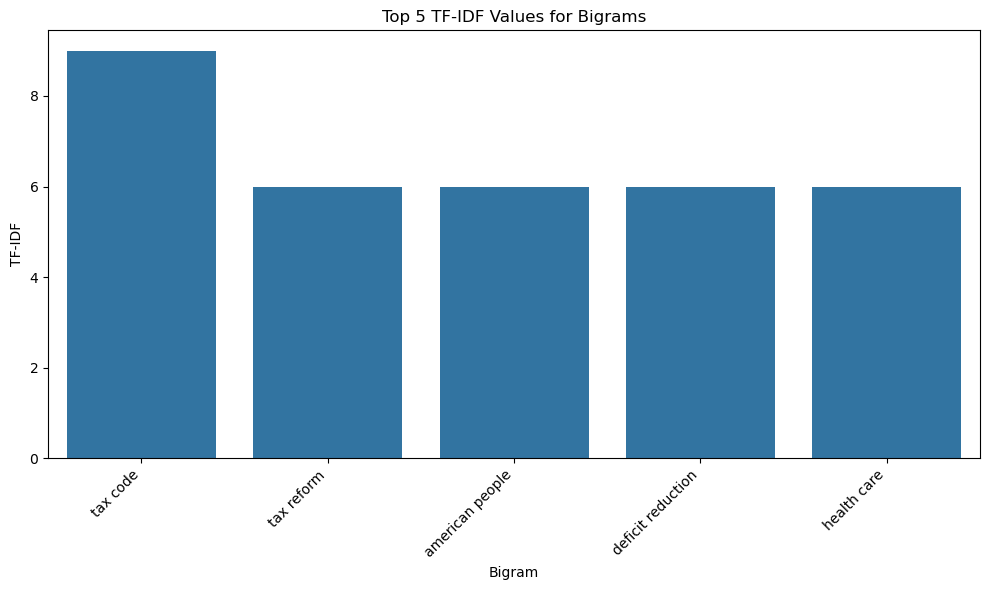

In [34]:
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import FreqDist
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from nltk import bigrams

documents = ['Now is our best chance for bipartisan, comprehensive tax reform that encourages job creation and helps bring down the deficit. We can get this done. The American people deserve a tax code that helps small businesses spend less time filling out complicated forms, and more time expanding and hiring a tax code that ensures billionaires with high-powered accountants can’t work the system and pay a lower rate than their hardworking secretaries; a tax code that lowers incentives to move jobs overseas, and lowers tax rates for businesses and manufacturers that are creating jobs right here in the United States of America. That’s what tax reform can deliver. That’s what we can do together. ',
             'Tonight, thanks to the grit and determination of the American people, there is much progress to report. After a decade of grinding war, our brave men and women in uniform are coming home. After years of grueling recession, our businesses have created over six million new jobs. We buy more American cars than we have in five years, and less foreign oil than we have in twenty years. Our housing market is healing, our stock market is rebounding, and consumers, patients, and homeowners enjoy stronger protections than ever before.',
             'But we can’t ask senior citizens and working families to shoulder the entire burden of deficit reduction while asking nothing more from the wealthiest and the most powerful. We won’t grow the middle class simply by shifting the cost of health care or college onto families that are already struggling, or by forcing communities to lay off more teachers and more cops and more firefighters. Most Americans ,Democrats, Republicans, and independents will understand that we can’t just cut our way to prosperity. They know that broad-based economic growth requires a balanced approach to deficit reduction, with spending cuts and revenue, and with everybody doing their fair share. And that’s the approach I offer tonight. On Medicare, I’m prepared to enact reforms that will achieve the same amount of health care savings by the beginning of the next decade as the reforms proposed by the bipartisan Simpson-Bowles commission.'
]

# Tokenize and preprocess documents
tokenized_documents = [word_tokenize(doc) for doc in documents]

translator = str.maketrans("", "", string.punctuation)
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

preprocessed_documents = []
for doc_tokens in tokenized_documents:
    # Remove punctuation, convert to lowercase, remove stop words, and lemmatize
    tokens_no_punctuation = [token.translate(translator) for token in doc_tokens if token.isalpha()]
    tokens_no_stopwords = [token for token in tokens_no_punctuation if token.lower() not in stop_words]
    tokens_lemmatized = [lemmatizer.lemmatize(token.lower()) for token in tokens_no_stopwords]
    preprocessed_documents.append(tokens_lemmatized)

# Generate bigrams for each document
bigrams_list = [list(bigrams(tokens)) for tokens in preprocessed_documents]

# Flatten the list of bigrams
all_bigrams = [bigram for bigrams_doc in bigrams_list for bigram in bigrams_doc]

# Calculate TF (Term Frequency) for bigrams
tf_bigrams = FreqDist(all_bigrams)
# Calculate IDF (Inverse Document Frequency) for bigrams
total_documents = len(documents)
idf_bigrams = {bigram: total_documents / (1 if bigram in all_bigrams else 0 + 1) for bigram in set(all_bigrams)}

# Calculate TF-IDF for bigrams
tfidf_bigrams = {bigram: tf_bigrams[bigram] * idf_bigrams[bigram] for bigram in tf_bigrams}

# Display top 5 TF-IDF values for bigrams
sorted_tfidf_bigrams = sorted(tfidf_bigrams.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 TF-IDF Values for Bigrams:")
for bigram, tfidf_value in sorted_tfidf_bigrams:
    print(f"{bigram}: {tfidf_value:.4f}")
print()

# Create a plot for the top 5 TF-IDF values for bigrams
df_bigrams = pd.DataFrame(sorted_tfidf_bigrams, columns=['Bigram', 'TF-IDF'])

#plt.figure(figsize=(10, 6))
#sns.barplot(x='Bigram', y='TF-IDF', data=df_bigrams)
#plt.title('Top 5 TF-IDF Values for Bigrams')
#plt.xticks(rotation=45, ha='right')
#plt.tight_layout()
#plt.show()

# Convert bigram tuples to strings
df_bigrams['Bigram'] = df_bigrams['Bigram'].apply(lambda x: ' '.join(x))

# Plot top 5 TF-IDF values
plt.figure(figsize=(10, 6))
sns.barplot(x='Bigram', y='TF-IDF', data=df_bigrams)
plt.title('Top 5 TF-IDF Values for Bigrams')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Uddate example above


Top 5 bigrams by summed TF-IDF across the corpus:
              Bigram  TF-IDF (sum)
0           tax code      0.354593
1         tax reform      0.236395
2  deficit reduction      0.227921
3        health care      0.227921
4    american people      0.199009


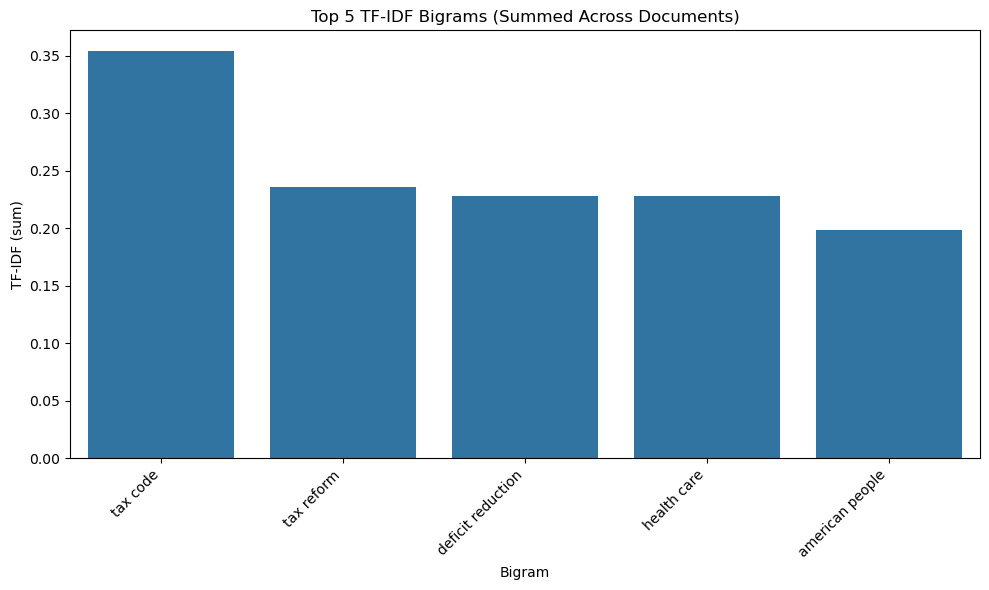

In [128]:
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

# Run once if needed:
# nltk.download("punkt")
# nltk.download("stopwords")
# nltk.download("wordnet")

documents = [
    "Now is our best chance for bipartisan, comprehensive tax reform that encourages job creation and helps bring down the deficit. We can get this done. The American people deserve a tax code that helps small businesses spend less time filling out complicated forms, and more time expanding and hiring a tax code that ensures billionaires with high-powered accountants can’t work the system and pay a lower rate than their hardworking secretaries; a tax code that lowers incentives to move jobs overseas, and lowers tax rates for businesses and manufacturers that are creating jobs right here in the United States of America. That’s what tax reform can deliver. That’s what we can do together.",
    "Tonight, thanks to the grit and determination of the American people, there is much progress to report. After a decade of grinding war, our brave men and women in uniform are coming home. After years of grueling recession, our businesses have created over six million new jobs. We buy more American cars than we have in five years, and less foreign oil than we have in twenty years. Our housing market is healing, our stock market is rebounding, and consumers, patients, and homeowners enjoy stronger protections than ever before.",
    "But we can’t ask senior citizens and working families to shoulder the entire burden of deficit reduction while asking nothing more from the wealthiest and the most powerful. We won’t grow the middle class simply by shifting the cost of health care or college onto families that are already struggling, or by forcing communities to lay off more teachers and more cops and more firefighters. Most Americans, Democrats, Republicans, and independents will understand that we can’t just cut our way to prosperity. They know that broad-based economic growth requires a balanced approach to deficit reduction, with spending cuts and revenue, and with everybody doing their fair share. And that’s the approach I offer tonight. On Medicare, I’m prepared to enact reforms that will achieve the same amount of health care savings by the beginning of the next decade as the reforms proposed by the bipartisan Simpson-Bowles commission."
]

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
translator = str.maketrans("", "", string.punctuation)

def cleaner_tokenizer(text: str):
    tokens = word_tokenize(text)
    tokens = [t.translate(translator) for t in tokens if t.isalpha()]
    tokens = [t.lower() for t in tokens if t.lower() not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return tokens

# TF-IDF over bigrams only
vectorizer = TfidfVectorizer(
    tokenizer=cleaner_tokenizer,
    lowercase=False,
    token_pattern=None,
    ngram_range=(2, 2)   # bigrams
)

X = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()

# Compute a simple corpus-level "importance" score for each bigram:
# sum TF-IDF across documents (other options: max, mean)
scores = X.sum(axis=0).A1

top_n = 5
top_idx = scores.argsort()[::-1][:top_n]

top_bigrams = feature_names[top_idx]
top_scores = scores[top_idx]

df_bigrams = pd.DataFrame({"Bigram": top_bigrams, "TF-IDF (sum)": top_scores})

print("Top 5 bigrams by summed TF-IDF across the corpus:")
print(df_bigrams)

plt.figure(figsize=(10, 6))
sns.barplot(x="Bigram", y="TF-IDF (sum)", data=df_bigrams)
plt.title("Top 5 TF-IDF Bigrams (Summed Across Documents)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## Ngrams

So, we could contine to play this game by chopping up words into Ngrams where say N is equal to 3. By doing this we are better approximating natural language structures. 
Think about it -= we have thus far treated each document as a collection of individual words (unigrams) and used TF-IDF to weight their importance. 

In many text analysis tasks, however, meaning is often conveyed by phrases rather than single words, such as “power plant,” “price cap,” or “please review.” In the next session, we will extend this framework to bigrams and n-grams, which allow TF-IDF to capture short sequences of words and model more contextual information. 

This builds directly on the same document–corpus–feature representation we have already established, with only a small change to how features are constructed.

Top 5 TF-IDF Trigrams (Summed Across Documents):
                      Ngram  TF-IDF (sum)
0         year less foreign      0.144338
1      healing stock market      0.144338
2  homeowner enjoy stronger      0.144338
3    housing market healing      0.144338
4       year housing market      0.144338


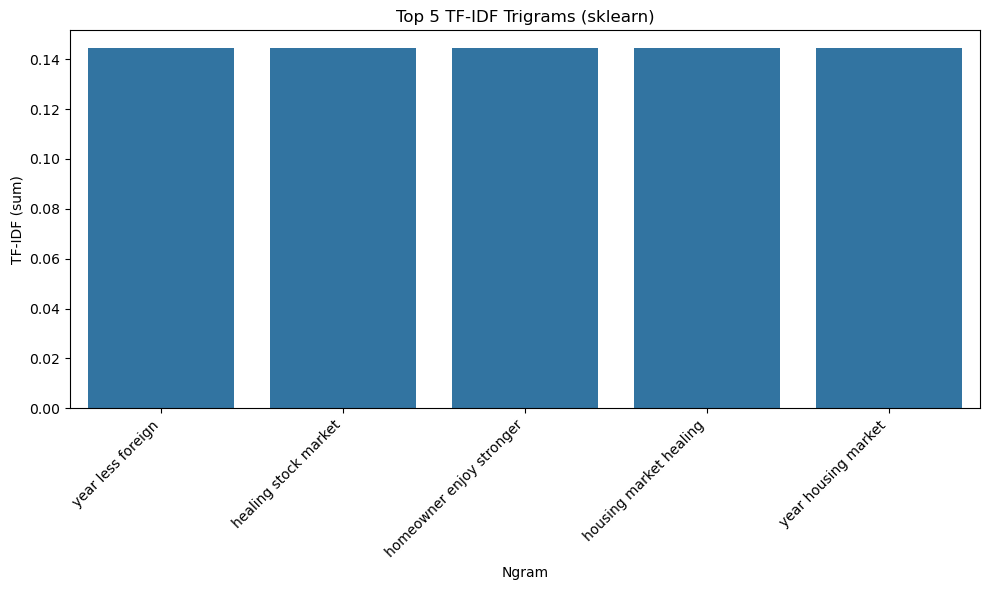

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer

# Reuse your cleaner_tokenizer (or define it exactly as before)
# vectorizer will treat each trigram as a "term"

vectorizer = TfidfVectorizer(
    tokenizer=cleaner_tokenizer,
    lowercase=False,
    token_pattern=None,
    ngram_range=(3, 3)   # trigrams
)

X = vectorizer.fit_transform(documents)
terms = vectorizer.get_feature_names_out()

# Rank trigrams by summed TF-IDF across documents (corpus-level importance)
scores = X.sum(axis=0).A1

top_n = 5
top_idx = np.argsort(scores)[::-1][:top_n]

df_tri = pd.DataFrame({
    "Ngram": terms[top_idx],
    "TF-IDF (sum)": scores[top_idx]
})

print("Top 5 TF-IDF Trigrams (Summed Across Documents):")
print(df_tri)

plt.figure(figsize=(10, 6))
sns.barplot(x="Ngram", y="TF-IDF (sum)", data=df_tri)
plt.title("Top 5 TF-IDF Trigrams (sklearn)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## Back To Enron Data

Let's get back to the Enron Data to


In [142]:
url = "https://raw.githubusercontent.com/steviep42/bios_534/main/data/energy_bids.csv"

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Read the CSV file into a DataFrame
#df = pd.read_csv(url, names=['email', 'response'])
enron_data = pd.read_csv(url)

top_words = set(stopwords.words("english"))

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [
        word.lower()
        for word in tokens
        if word.isalpha() and word.lower() not in stop_words
    ]
    return " ".join(tokens)

enron_data["email"] = enron_data["email"].apply(preprocess_text)

X = enron_data["email"]
y = enron_data["responsive"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Unigrams
pipeline_uni = Pipeline([
    ("tfidf", TfidfVectorizer(
        min_df=5,
        max_df=0.5,
        max_features=500,
        ngram_range=(1, 1)   # unigrams only
    )),
    ("clf", LogisticRegression(max_iter=2000))
])

scores_uni = cross_val_score(
    pipeline_uni,
    X,
    y,
    cv=5,
    scoring="accuracy"
)

print("Unigrams only:")
for i, s in enumerate(scores_uni, 1):
    print(f"  Fold {i}: {s:.3f}")
print(f"  Mean accuracy: {np.mean(scores_uni):.3f}")


Unigrams only:
  Fold 1: 0.860
  Fold 2: 0.871
  Fold 3: 0.901
  Fold 4: 0.906
  Fold 5: 0.930
  Mean accuracy: 0.894


In [140]:
pipeline_bi = Pipeline([
    ("tfidf", TfidfVectorizer(
        min_df=5,
        max_df=0.5,
        max_features=5000,     # often need more features with bigrams
        ngram_range=(1, 2)     # unigrams + bigrams
    )),
    ("clf", LogisticRegression(max_iter=2000))
])

scores_bi = cross_val_score(
    pipeline_bi,
    X,
    y,
    cv=5,
    scoring="accuracy"
)

print("\nUnigrams + Bigrams:")
for i, s in enumerate(scores_bi, 1):
    print(f"  Fold {i}: {s:.3f}")
print(f"  Mean accuracy: {np.mean(scores_bi):.3f}")



Unigrams + Bigrams:
  Fold 1: 0.871
  Fold 2: 0.860
  Fold 3: 0.883
  Fold 4: 0.889
  Fold 5: 0.906
  Mean accuracy: 0.882


In [141]:
import numpy as np

vectorizer = pipeline_bi.named_steps["tfidf"]
clf = pipeline_bi.named_steps["clf"]

feature_names = vectorizer.get_feature_names_out()
coefs = clf.coef_[0]  # binary classification

bigram_mask = np.array([" " in t for t in feature_names])
bigram_idx = np.where(bigram_mask)[0]

top_n = 15

bigram_terms = feature_names[bigram_idx]
bigram_coefs = coefs[bigram_idx]

# Top positive bigrams (push toward class 1)
pos = np.argsort(bigram_coefs)[-top_n:][::-1]
print(f"\nTop {top_n} bigrams pushing toward class 1:")
for term, val in zip(bigram_terms[pos], bigram_coefs[pos]):
    print(f"{term:<35} {val:.3f}")

# Top negative bigrams (push toward class 0)
neg = np.argsort(bigram_coefs)[:top_n]
print(f"\nTop {top_n} bigrams pushing toward class 0:")
for term, val in zip(bigram_terms[neg], bigram_coefs[neg]):
    print(f"{term:<35} {val:.3f}")


NotFittedError: Vocabulary not fitted or provided

In small corpora, trigram TF-IDF values often end up identical because most trigrams appear only once and in only one document. When term frequency and document frequency are the same for all trigrams, the inverse document frequency is also the same, leaving no variation for TF-IDF to exploit. This is expected behavior and reflects the increasing sparsity that comes with longer n-grams. As the corpus grows—or when unigrams, bigrams, and trigrams are combined—TF-IDF regains the ability to distinguish informative phrases.

## Sentiment Analysis

Sentiment analysis is the process of determining the emotional tone behind a piece of text. It involves analyzing the words used in the text to identify whether the expressed sentiment is positive, negative, or neutral. Sentiment analysis is widely used in various applications, from customer reviews and social media monitoring to brand reputation management.

<center><img src="pics/nlp_sentimentf.png" width=320 height=320 /></center>

Sentiment analysis plays a crucial role in understanding public opinion, customer feedback, and overall sentiment towards a product, service, or topic. In the digital age, where vast amounts of text data are generated daily, sentiment analysis provides valuable insights for businesses, researchers, and decision-makers.

Imagine a scenario where a company wants to gauge customer reactions to a newly launched product. By analyzing social media comments, reviews, or customer feedback forms, sentiment analysis can categorize responses as positive, negative, or neutral. This information helps companies make data-driven decisions, address concerns, and enhance user experiences.

<center><img src="pics/nlp_tweets.png"  /></center>


You probably will not be surprised to learn that NLTK will help you implement sentiment analysis. Note you will quite likely have to do the following before this example will work for you. Go to the command line within your active conda environment (the same one you are using to run this notebook). Then type the following commands to get the download happening. You only have to do it once.  

```
>>> import nltk
>>> nltk.download('vader_lexicon')
```

In [36]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

def analyze_sentiments(statements):
    
    # Initialize NLTK's Sentiment Intensity Analyzer
    sia = SentimentIntensityAnalyzer()

    # Perform sentiment analysis for each statement
    sentiment_scores = []

    for statement in statements:
        sentiment_score = sia.polarity_scores(statement)
        sentiment_scores.append({'Compound_Score': sentiment_score['compound'],'Statement': statement})

    # Create a DataFrame from the list of sentiment scores
    df = pd.DataFrame(sentiment_scores)

    return df

# Example usage

statements = [
    "I absolutely loved the new movie! The acting was fantastic, and the plot was captivating.",
    "The product quality is disappointing, and the customer service was terrible.",
    "Today is another day is it not?",
    "Not being born into a rich family was my first financial mistake.",
    "Kinda rude you can't block team members on Microsoft Teams but okay",
    "I have a phone interview today and someone told me to 'just be myself' so I’m not going to answer the call"
]

result_df = analyze_sentiments(statements)

# Display the resulting DataFrame
print(result_df)


   Compound_Score                                          Statement
0          0.8436  I absolutely loved the new movie! The acting w...
1         -0.7430  The product quality is disappointing, and the ...
2          0.0000                    Today is another day is it not?
3          0.2960  Not being born into a rich family was my first...
4          0.2958  Kinda rude you can't block team members on Mic...
5          0.0000  I have a phone interview today and someone tol...


In [37]:
# I don't line 
analyze_sentiments(["I hate United Airlines",
                    "Delta Airlines. Thank you so much for losing my luggage"])


,Compound_Score,Statement
0,-0.2263,I hate United Airlines
1,-0.0935,Delta Airlines. Thank you so much for losing m...


Remember our Obama documents? We could evaluate them for sentinment also? It turns out that each of them are rated as being strongly positive which is generally not surpising for a political speech. In a general case we might use this function on some tweets or comments made about product reviews.

In [38]:
analyze_sentiments(documents)

,Compound_Score,Statement
0,0.9468,"Now is our best chance for bipartisan, compreh..."
1,0.8979,"Tonight, thanks to the grit and determination ..."
2,0.8700,But we can’t ask senior citizens and working f...


## Document Similarity 

To understand the concept of Document Similarity let's consider three sentences as being three documents. It's possible to tokenize these sentences in a way that makes it easy to form something called a Term/Document matrix. A TDM makes it easy to visualize which words appear in which document.

```
Natural language processing is a fascinating field
Document similarity is crucial in various applications
NLTK provides powerful tools for text analysis
```
**1) Tokenization**: Now, let's tokenize the sentences:

```
["Natural", "language", "processing", "is", "a", "fascinating", "field"]
["Document", "similarity", "is", "crucial", "in", "various", "applications"]
["NLTK", "provides", "powerful", "tools", "for", "text", "analysis"]
```

**2) Create a Vocabulary**: The next step would be to determine the unique words across all these three documents. This gives us a common vocabulary.

```
["Natural", "language", "processing", "is", "a", "fascinating", "field", "Document", "similarity", "crucial", "in", "various", "applications", "NLTK", "provides", "powerful", "tools", "for", "text", "analysis"]
```

**3) Create a Matrix**: So if we form a matrix where the rows are Sentences / Documents 1, 2, 3
and the columns are the words from number 2 above we could get a matrix structure like that below. Note that if, for example, Sentence 1 has the word "Natural" then we place a "1" under the column corresponding to the word "Natural" else we would have a "0".

| Sentence                  | Natural | language | processing | is | a | fascinating | field | Document | similarity | crucial | in | various | applications | NLTK | provides | powerful | tools | for | text | analysis |
|---------------------------|---------|----------|------------|----|---|-------------|--------|----------|------------|---------|----|---------|----------------|------|-----------|----------|------|-----|------|-----------|
| "Natural language..."     | 1       | 1        | 1          | 1  | 1 | 1           | 1      | 0        | 0          | 0       | 0  | 0       | 0              | 0    | 0         | 0        | 0    | 0   | 0    | 0         |
| "Document similarity..."  | 0       | 0        | 0          | 1  | 0 | 0           | 0      | 1        | 1          | 1       | 1  | 1       | 1              | 0    | 0         | 0        | 0    | 0   | 0    | 0         |
| "NLTK provides powerful..."| 0       | 0        | 0          | 1  | 0 | 0           | 0      | 0        | 0          | 0       | 0  | 0       | 0              | 1    | 1         | 1        | 1    | 1   | 1    | 1         |


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from tabulate import tabulate

# Example sentences
sentences = [
    "Natural language processing is a fascinating field.",
    "Document similarity is crucial in various applications.",
    "NLTK provides powerful tools for text analysis."
]

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit and transform the sentences
X = vectorizer.fit_transform(sentences)

# Get the feature names (vocabulary)
feature_names = vectorizer.get_feature_names_out()

# Convert the sparse matrix to a dense array for better visualization
dense_array = X.toarray()

# Display the term-document matrix using tabulate
table_headers = [""] + feature_names[:7]
table_data = [[f"Sentence {i+1}"] + list(map(str, dense_array[i][:7])) for i in range(len(sentences))]

# Print the table
print(tabulate(table_data, headers=table_headers, tablefmt="grid"))



+------------+------------+----------------+-----------+------------+---------------+---------+-------+
|            |   analysis |   applications |   crucial |   document |   fascinating |   field |   for |
+============+============+================+===========+============+===============+=========+=======+
| Sentence 1 |          0 |              0 |         0 |          0 |             1 |       1 |     0 |
+------------+------------+----------------+-----------+------------+---------------+---------+-------+
| Sentence 2 |          0 |              1 |         1 |          1 |             0 |       0 |     0 |
+------------+------------+----------------+-----------+------------+---------------+---------+-------+
| Sentence 3 |          1 |              0 |         0 |          0 |             0 |       0 |     1 |
+------------+------------+----------------+-----------+------------+---------------+---------+-------+


In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from tabulate import tabulate

# Example sentences
sentences = [
    "Natural language processing is a fascinating field.",
    "Document similarity is crucial in various applications.",
    "NLTK provides powerful tools for text analysis."
]

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit and transform the sentences
X = vectorizer.fit_transform(sentences)

# Get the feature names (vocabulary)
feature_names = vectorizer.get_feature_names_out()

# Convert the sparse matrix to a dense array for better visualization
dense_array = X.toarray()

# Transpose the dense array
transposed_array = dense_array.T

# Display the flipped term-document matrix using tabulate
table_headers = [""] + [f"Sentence {i+1}" for i in range(len(sentences))]
table_data = [[word] + list(map(str, transposed_array[i])) for i, word in enumerate(feature_names)]

# Print the table
print(tabulate(table_data, headers=table_headers, tablefmt="grid"))


+--------------+--------------+--------------+--------------+
|              |   Sentence 1 |   Sentence 2 |   Sentence 3 |
+==============+==============+==============+==============+
| analysis     |            0 |            0 |            1 |
+--------------+--------------+--------------+--------------+
| applications |            0 |            1 |            0 |
+--------------+--------------+--------------+--------------+
| crucial      |            0 |            1 |            0 |
+--------------+--------------+--------------+--------------+
| document     |            0 |            1 |            0 |
+--------------+--------------+--------------+--------------+
| fascinating  |            1 |            0 |            0 |
+--------------+--------------+--------------+--------------+
| field        |            1 |            0 |            0 |
+--------------+--------------+--------------+--------------+
| for          |            0 |            0 |            1 |
+-------

## Beyond TDMs - Cosine Similarity

As previously mentioned, constructs like Term Document Matrices (TDM) are a common approach used in natural language processing to represent text data by counting the frequency of words in documents. While TDMs are effective for smaller datasets and simple tasks, they encounter several challenges at scale. 

As the size of the corpus increases, TDMs become increasingly sparse and high-dimensional, making them computationally expensive to process and store. Additionally, TDMs often fail to capture the semantic relationships between words, as they treat each word as an independent feature. 

In contrast, projection of words into a vector space, such as word embeddings, offers a more efficient and effective representation of text data. Word embeddings capture the semantic meaning of words by mapping them to dense, continuous vectors in a lower-dimensional space. 

This allows for more meaningful comparisons between words and enables algorithms to generalize better to unseen data. By leveraging word embeddings, NLP models can achieve higher performance on a wide range of tasks, from document classification to machine translation, making them a preferred choice for large-scale text processing.

**Cosine Similarity**

Cosine similarity is a metric used to measure the similarity between two vectors in a multi-dimensional space, often used to compare the similarity between documents, words, or other text representations.

Cosine similarity calculates the cosine of the angle between two vectors, which is a measure of how much the vectors point in the same direction. The cosine similarity score ranges from -1 to 1, where:

- 1 indicates that the vectors are identical and point in the same direction.
- 0 indicates that the vectors are orthogonal (perpendicular), meaning they have no similarity.
- -1 indicates that the vectors point in opposite directions.

In NLP, cosine similarity is often used to compare word embeddings or document vectors. Higher cosine similarity scores indicate greater similarity between the vectors, meaning the words or documents are more similar in meaning or context. So if we have two vectors A and B here is the formula to compute their cosine similarity:


$$ \mathbf{A}\cdot\mathbf{B}
=\left\|\mathbf{A}\right\|\left\|\mathbf{B}\right\|\cos\theta $$

$$  \cos(\theta) = {\mathbf{A} \cdot \mathbf{B} \over \|\mathbf{A}\| \|\mathbf{B}\|}  $$

Here's a small code example that demonstrates how to calculate and visualize this idea:


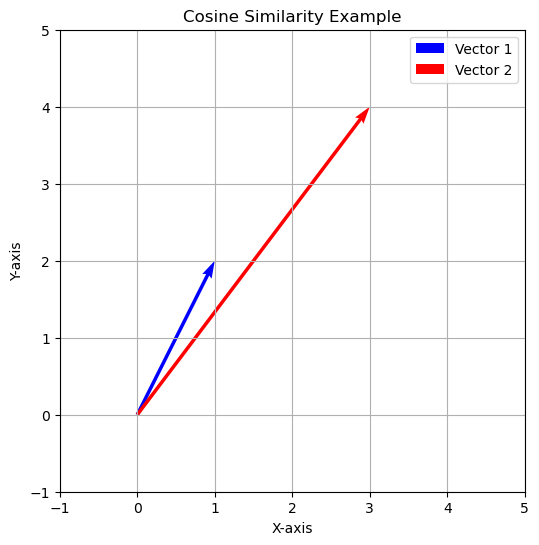

Cosine similarity between Vector 1 and Vector 2: 0.98


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Define two example vectors
vector1 = np.array([1, 2])
vector2 = np.array([3, 4])

# Calculate cosine similarity between the vectors
similarity_score = cosine_similarity([vector1], [vector2])[0][0]

# Plot the vectors
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, vector1[0], vector1[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Vector 1')
plt.quiver(0, 0, vector2[0], vector2[1], angles='xy', scale_units='xy', scale=1, color='red', label='Vector 2')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Cosine Similarity Example')
plt.grid(True)
plt.legend()
plt.show()

print(f"Cosine similarity between Vector 1 and Vector 2: {similarity_score:.2f}")


To build on this concept we introduce two sentences. Keep in mind that of necessity that these examples are small but imagine if the text variables below were:

1) Entire books
2) Resumes
3) Corporate Annual reports
4) Religious texts
5) Tweets
6) Song Lyrics
7) Research Papers

We could then, for example, compare research papers in group 7 to determine if plagiarism had been committed. In the following example we compare to sentences by doing the following:

1) Tokenize the sentences
2) Use the **Word2Vec** technique to project the sentences into a higher vector space
3) Use Cosine Similarity to see how similare they might be:

In [41]:
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

# Sample sentences
sentence1 = "I love eating pizza"
sentence2 = "I hate eating pizza"

# Tokenize sentences
tokens1 = word_tokenize(sentence1.lower())
tokens2 = word_tokenize(sentence2.lower())

# Combine tokens
combined_tokens = [tokens1, tokens2]

# Train Word2Vec model
model = Word2Vec(combined_tokens, min_count=1, vector_size=100)

# Calculate cosine similarity
vector1 = model.wv[tokens1]
vector2 = model.wv[tokens2]
similarity = cosine_similarity(vector1, vector2)

print(f"Cosine similarity between the two sentences: {similarity[0][0]:.2f}")


Cosine similarity between the two sentences: 1.00


In [42]:
# Sample sentences
sentence1 = "I love eating pizza"
sentence2 = "Breakfast is my favorite meal"

# Tokenize sentences
tokens1 = word_tokenize(sentence1.lower())
tokens2 = word_tokenize(sentence2.lower())

# Combine tokens
combined_tokens = [tokens1, tokens2]

# Train Word2Vec model
model = Word2Vec(combined_tokens, min_count=1, vector_size=100)

# Calculate cosine similarity
vector1 = model.wv[tokens1]
vector2 = model.wv[tokens2]
similarity = cosine_similarity(vector1, vector2)

print(f"Cosine similarity between the two sentences: {similarity[0][0]:.2f}")


Cosine similarity between the two sentences: -0.07


### Word2Vec

So I've slipped in some new terminology, specifically **Word2Vec**. What is that ? Very important question.

Word2Vec is a popular technique in natural language processing (NLP) for learning distributed representations of words in a continuous vector space. Developed by Tomas Mikolov et al. at Google in 2013, Word2Vec has revolutionized the field of NLP by capturing the semantic meaning of words in a dense, low-dimensional vector space. 

Word2Vec operates on the principle of distributional semantics, which posits that words appearing in similar contexts tend to have similar meanings. The model learns word embeddings by processing large corpora of text data and optimizing the embeddings to predict the surrounding words (Skip-gram) or predict the target word from the context (Continuous Bag of Words, CBOW). 

By leveraging neural network architectures, Word2Vec can capture complex linguistic patterns and semantic relationships between words. These word embeddings are then used as features in downstream NLP tasks such as sentiment analysis, document classification, and machine translation, where they often outperform traditional sparse representations like bag-of-words or TF-IDF.

My goal in making a big deal out of all this is because an understanding of projection of words into a vector space is key when thinking about Large Language Models which is something we'll talk about later.

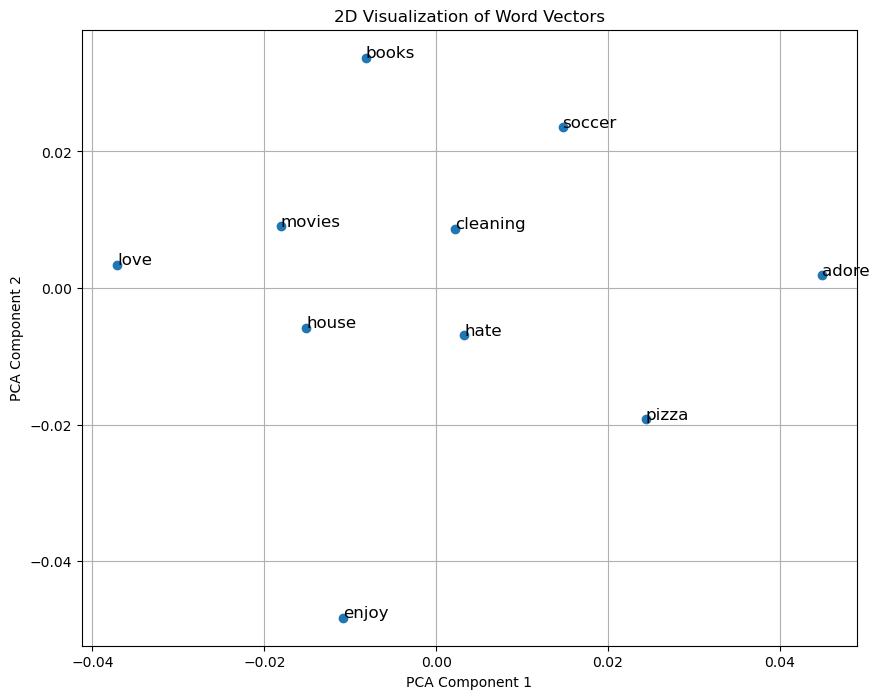

In [43]:
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sample corpus (you can replace this with your own text data)
corpus = [
    "I love eating pizza",
    "I enjoy eating burgers",
    "She likes watching movies",
    "He dislikes reading books",
    "They adore playing soccer",
    "We hate cleaning the house"
]

# Tokenize the corpus
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

# Train Word2Vec model
model = Word2Vec(tokenized_corpus, min_count=1, vector_size=100)

# Get some common words from the model's vocabulary
common_words = ['love', 'enjoy', 'hate', 'adore', 'dislike', 'cleaning', 'pizza', 'burger', 'movies', 'books', 'soccer', 'house']
common_words = [word for word in common_words if word in model.wv]

# Check if any common words are present
if not common_words:
    print("No common words found in the model's vocabulary.")
else:
    # Get word vectors for the common words
    vectors = [model.wv[word] for word in common_words]
    
    # Apply PCA to reduce dimensions to 2D
    pca = PCA(n_components=2)
    vectors_2d = pca.fit_transform(vectors)

    # Plot word vectors
    plt.figure(figsize=(10, 8))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], marker='o')
    for i, word in enumerate(common_words):
        plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=12)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('2D Visualization of Word Vectors')
    plt.grid(True)
    plt.show()





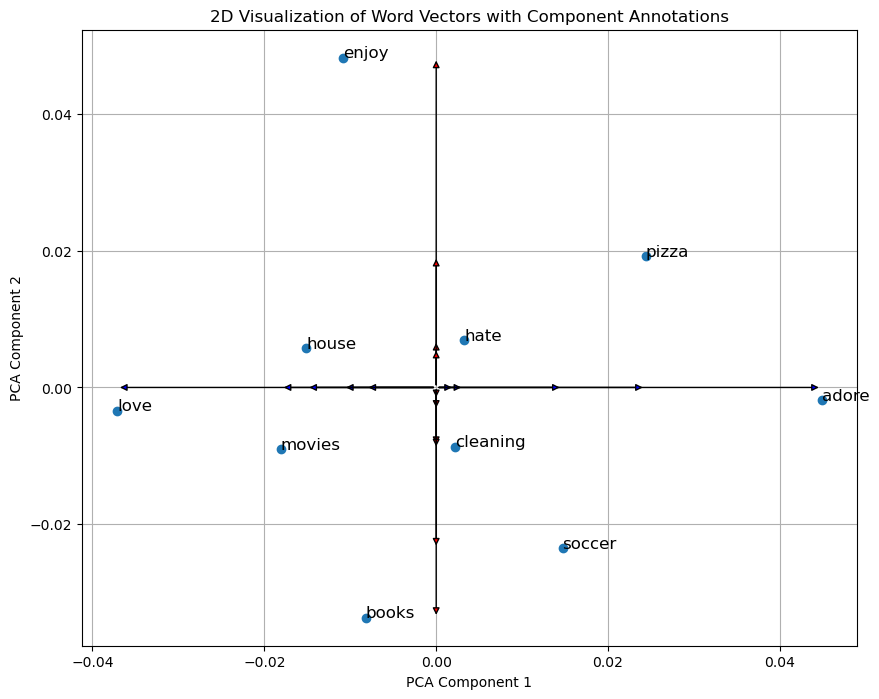

In [57]:
import numpy as np

# Plot word vectors with annotations
plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], marker='o')
for i, word in enumerate(common_words):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=12)
    # Add annotations for component directions
    plt.annotate("", xy=(vectors_2d[i, 0], 0), xytext=(0, 0),
                 arrowprops=dict(facecolor='blue', arrowstyle='-|>'))
    plt.annotate("", xy=(0, vectors_2d[i, 1]), xytext=(0, 0),
                 arrowprops=dict(facecolor='red', arrowstyle='-|>'))
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Visualization of Word Vectors with Component Annotations')
plt.grid(True)
plt.show()


### Entity Recognition and Embeddings

Traditionally, natural language processing tasks such as term-document matrices have served as the backbone for various text analysis applications. However, while these methods are understandable and straightforward, they suffer from scalability issues and often fall short in capturing the nuanced context of language. 

Although techniques like N-grams can partially address this limitation by considering sequences of words in a phrase or a sentence, they remain constrained by their finite scope. Recognizing the need to extract not just individual terms but also the contextual meaning behind phrases, modern approaches turn to sophisticated tools like SpaCy. 

SpaCy offers a pathway beyond simple tokenization and parsing, providing a rich framework for tasks such as Named Entity Recognition (NER) and syntactic analysis. These functionalities pave the way for exploring more advanced concepts like embeddings, which offer a deeper and more interpretable understanding of language semantics

# Differences Between NLTK and SpaCY

SpaCy and NLTK are both popular libraries for natural language processing (NLP) in Python, but they differ significantly in their design philosophies and capabilities. NLTK, or Natural Language Toolkit, is a comprehensive library that has been around for a longer time and offers a wide range of NLP functionalities, including tokenization, stemming, tagging, parsing, and more. It provides a vast array of algorithms and tools for various NLP tasks, making it suitable for educational purposes and research. 

However, NLTK can be cumbersome for large-scale projects due to its slower processing speed and lack of optimizations. On the other hand, SpaCy is a newer library that focuses on performance and ease of use. It is built for production-level NLP tasks and provides pre-trained models for tasks like tokenization, named entity recognition (NER), and syntactic parsing. 

SpaCy's architecture is highly optimized, allowing for faster processing speeds compared to NLTK. Moreover, SpaCy's integration with deep learning frameworks like TensorFlow and PyTorch makes it a better choice for tasks involving embeddings, as it provides a smoother transition into more advanced NLP techniques." To get acquainted with SpaCy is easy. It can do many of the things that NLTK can do although SpaCy is more aligned with the idea of bulding models to predict interesting things about any text you have given it. To start out with, let's just show that it can do the basics. Here we will do lemmatization:


In [44]:
import spacy
from spacy.cli import download

download("en_core_web_sm")  # Download the model
nlp = spacy.load("en_core_web_sm")  # Load the model
lemmatizer = nlp.get_pipe("lemmatizer")
print(lemmatizer.mode)  # 'rule'

doc = nlp("I was reading the paper.")
print([token.lemma_ for token in doc])


doc = nlp("I am so sleepy today. I didn't get much sleep last night because I stayed out late.")
print([token.lemma_ for token in doc])


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 14.2 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
rule
['I', 'be', 'read', 'the', 'paper', '.']
['I', 'be', 'so', 'sleepy', 'today', '.', 'I', 'do', 'not', 'get', 'much', 'sleep', 'last', 'night', 'because', 'I', 'stay', 'out', 'late', '.']


In [45]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("I am so sleepy today. I didn't get much sleep last night because I stayed out late.")
for token in doc:
    print(token.text)


I
am
so
sleepy
today
.
I
did
n't
get
much
sleep
last
night
because
I
stayed
out
late
.


### Understanding The Text

So we could work through some examples that describe how SpaCy solves the same problems as NLTK but that wouldn't be so interesting. One of the cool things SpaCy has are pre-built language models in a variety of languages. These models "understand" grammar constructs which us helpful in parsing text because you can extract action words and ignore things like prepositions that don't really help you understand the meaning of a phrase. However, you can figure out what the relationship might be between two objects using the preposition. It's generally useful to identify these aspects of language. 

For the English language SpaCy has three models:

1) en_core_web_sm
2) en_core_web_md
3) en_core_web_lg

We'll work with the first one because its smaller. Note that before loading any of these models you will have to first install them. Go to a terminal window in the same folder where you started your jupyter notebook session. Also make sure you know what your current conda environment name is. If you haven't already installed SpaCY then you'll need to a 

```
conda install SpaCy
```

You can then start Python within this environment and execute the following command:

```
python -m spacy download en_core_web_sm
```

So now we can demonstrate the power of SpaCy.

In [46]:
import spacy

# Note to get the en_core_web_sm model do the following from a terminal within your
# conda environment
# python -m spacy download en_core_web_sm

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Example text
text = "Apple is looking at buying U.K. startup for $1 billion"

# Tokenization
doc = nlp(text)
print("Tokens:")
for token in doc:
    print(f"{token.text:10s} - {token.pos_:5s} - {token.dep_}")

# Named Entity Recognition (NER)
print("\nNamed Entities:")
for ent in doc.ents:
    print(f"{ent.text:10s} - {ent.label_}")

# Syntactic Analysis
print("\nSyntactic Analysis:")
for token in doc:
    print(f"{token.text:10s} - {token.pos_:5s} - {token.dep_}")


Tokens:
Apple      - PROPN - nsubj
is         - AUX   - aux
looking    - VERB  - ROOT
at         - ADP   - prep
buying     - VERB  - pcomp
U.K.       - PROPN - nsubj
startup    - VERB  - ccomp
for        - ADP   - prep
$          - SYM   - quantmod
1          - NUM   - compound
billion    - NUM   - pobj

Named Entities:
Apple      - ORG
U.K.       - GPE
$1 billion - MONEY

Syntactic Analysis:
Apple      - PROPN - nsubj
is         - AUX   - aux
looking    - VERB  - ROOT
at         - ADP   - prep
buying     - VERB  - pcomp
U.K.       - PROPN - nsubj
startup    - VERB  - ccomp
for        - ADP   - prep
$          - SYM   - quantmod
1          - NUM   - compound
billion    - NUM   - pobj


In [47]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
#displacy.serve(doc, style="dep",auto_select_port=True)
displacy.render(doc, style="dep",jupyter=True,options={'distance':120})

We can also highlight the entities in this sentence. Let's look at the entities for the Apple sentence. 

In [48]:
displacy.render(doc, style="ent",jupyter=True)

### Embeddings

The choice of the 96-dimensional vector representation in SpaCy's pre-trained word vectors is based on the underlying model architecture and the training process. SpaCy uses convolutional neural networks (CNNs) to learn word embeddings, which are then fine-tuned on specific downstream tasks like part-of-speech tagging and named entity recognition.

Now, let's discuss how word embeddings represent an improvement over the typical Term-Document Matrix (TDM) and N-gram approaches we saw in NLTK.


#### Semantic Representation: 

Word embeddings capture the semantic meaning of words in a continuous vector space. Unlike TDM, which represents words as binary or frequency counts in a sparse matrix, embeddings encode richer semantic relationships between words. This allows embeddings to capture more nuanced information about word context and similarity.

#### Contextual Information: 

Word embeddings consider the context in which words appear within a sentence or document. Each word's embedding is influenced by the surrounding words, enabling embeddings to capture context-dependent semantics. In contrast, N-grams capture fixed-size sequences of adjacent words but may fail to capture broader context.

#### Dimensionality Reduction: 

Word embeddings typically have lower dimensionality compared to TDMs, making them more efficient for storage and computation. While a TDM can be very high-dimensional, especially for large vocabularies, embeddings typically have a fixed dimensionality (e.g., 96 dimensions in SpaCy) regardless of vocabulary size.

#### Generalization: 

Word embeddings generalize well to unseen words and documents. They can capture similarities between words even if they have not been explicitly observed together in the training data. In contrast, TDMs and N-grams may struggle with out-of-vocabulary words or unseen combinations of words.

#### Performance: 

Models trained with word embeddings often achieve better performance on various NLP tasks, including sentiment analysis, machine translation, and named entity recognition. Embeddings provide richer semantic representations that facilitate learning more complex patterns in text data.

Overall, word embeddings represent a significant advancement over traditional TDMs and N-grams by capturing semantic meaning, contextual information, and generalizing well to unseen data, leading to improved performance in various NLP tasks.

In [49]:
from gensim.models import Word2Vec
import gensim
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
 
warnings.filterwarnings(action='ignore')
 
 
#  Reads ‘alice.txt’ file
sample = 'Now is our best chance for bipartisan, comprehensive tax reform that encourages job creation and helps bring down the deficit. We can get this done.  The American people deserve a tax code that helps small businesses spend less time filling out complicated forms, and more time expanding and hiring a tax code that ensures billionaires with high-powered accountants can’t work the system and pay a lower rate than their hardworking secretaries; a tax code that lowers incentives to move jobs overseas, and lowers tax rates for businesses and manufacturers that are creating jobs right here in the United States of America.  That’s what tax reform can deliver.  That’s what we can do together. Tonight, thanks to the grit and determination of the American people, there is much progress to report.  After a decade of grinding war, our brave men and women in uniform are coming home.  After years of grueling recession, our businesses have created over six million new jobs.  We buy more American cars than we have in five years, and less foreign oil than we have in twenty years.  Our housing market is healing, our stock market is rebounding, and consumers, patients, and homeowners enjoy stronger protections than ever before. But we can’t ask senior citizens and working families to shoulder the entire burden of deficit reduction while asking nothing more from the wealthiest and the most powerful. We won’t grow the middle class simply by shifting the cost of health care or college onto families that are already struggling, or by forcing communities to lay off more teachers and more cops and more firefighters. Most Americans ,Democrats, Republicans, and independents  will understand that we can’t just cut our way to prosperity. They know that broad-based economic growth requires a balanced approach to deficit reduction, with spending cuts and revenue, and with everybody doing their fair share.  And that’s the approach I offer tonight.  On Medicare, I’m prepared to enact reforms that will achieve the same amount of health care savings by the beginning of the next decade as the reforms proposed by the bipartisan Simpson-Bowles commission.'

 
# Replaces escape character with space
f = sample.replace("\n", " ")
 
data = []
 
# iterate through each sentence in the file
for i in sent_tokenize(f):
    temp = []
 
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
 
    data.append(temp)
 
# Create CBOW model
model1 = gensim.models.Word2Vec(data, min_count=1,
                                vector_size=100, window=5)
 
# Print results
print("Cosine similarity between 'tax' " +
      "and 'reform' - CBOW : ",
      model1.wv.similarity('tax', 'fair'))
 
print("Cosine similarity between 'tax' " +
      "and 'reform' - CBOW : ",
      model1.wv.similarity('tax', 'fair'))
 
# Create Skip Gram model
model2 = gensim.models.Word2Vec(data, min_count=1, vector_size=100,
                                window=5, sg=1)
 
# Print results
print("Cosine similarity between 'tax' " +
      "and 'reform' - Skip Gram : ",
      model2.wv.similarity('tax', 'fair'))
 
print("Cosine similarity between 'tax' " +
      "and 'reform' - Skip Gram : ",
      model2.wv.similarity('tax', 'fair'))

Cosine similarity between 'tax' and 'reform' - CBOW :  0.028531522
Cosine similarity between 'tax' and 'reform' - CBOW :  0.028531522
Cosine similarity between 'tax' and 'reform' - Skip Gram :  0.037879713
Cosine similarity between 'tax' and 'reform' - Skip Gram :  0.037879713


In [52]:
import requests
from bs4 import BeautifulSoup

# URL of the webpage with Obama's speeches
url = "https://millercenter.org/the-presidency/presidential-speeches/february-13-2013-2013-state-union-address"

# Send a GET request to the webpage
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page using Beautiful Soup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract and print the text content of the speeches
    speeches = soup.find_all('div', class_='transcript-inner')
    for speech in speeches:
         print(speech.get_text())

    else:
         print(f"Failed to retrieve the page. Status code: {response.status_code}")



Transcript

Mr. Speaker, Mr. Vice President, members of Congress, fellow citizens:  
 
Fifty-one years ago, John F. Kennedy declared to this chamber that “the Constitution makes us not rivals for power but partners for progress.”  (Applause.) “It is my task,” he said, “to report the State of the Union -- to improve it is the task of us all.”  
 
Tonight, thanks to the grit and determination of the American people, there is much progress to report.  After a decade of grinding war, our brave men and women in uniform are coming home.  (Applause.)  After years of grueling recession, our businesses have created over six million new jobs.  We buy more American cars than we have in five years, and less foreign oil than we have in 20.  (Applause.)  Our housing market is healing, our stock market is rebounding, and consumers, patients, and homeowners enjoy stronger protections than ever before.  (Applause.)  
 
So, together, we have cleared away the rubble of crisis, and we can say with renewe

In [53]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Example corpus
corpus = "Word embeddings capture semantic relationships in language."

# Tokenize the corpus
tokenized_corpus = [word_tokenize(corpus)]

# Train Word2Vec model
model_word2vec = Word2Vec(sentences=tokenized_corpus, vector_size=7, window=5, min_count=1, workers=4)
word_embedding = model_word2vec.wv['Word']  # Example: Access embedding for the word 'word'

In [54]:
tokenized_corpus
model_word2vec
word_embedding

array([ 0.13190205, -0.11654168,  0.06422569, -0.05910109,  0.01177909,
        0.12140886, -0.06374538], dtype=float32)

In [55]:
word_embedding.shape

(7,)

In [56]:
from gensim.models import Word2Vec

# Example corpus for training (you would have a larger corpus for training a model)
training_corpus = [
    ["word", "embeddings", "capture", "semantic", "relationships", "in", "language"],
    # ... more sentences ...
]

# Train a Word2Vec model
model = Word2Vec(sentences=training_corpus, vector_size=10, window=5, min_count=1, workers=4)

# Your target sentence
target_sentence = "Word embeddings capture semantic relationships in language."

# Tokenize the sentence
tokenized_sentence = target_sentence.lower().split()

# Get the word embeddings for each token in the sentence
word_embeddings = [model.wv[word] for word in tokenized_sentence if word in model.wv]

# Now, 'word_embeddings' contains the word vectors for each word in your sentence
print(word_embeddings)

[array([-0.01577653,  0.00321372, -0.0414063 , -0.07682689, -0.01508008,
        0.02469795, -0.00888027,  0.05533662, -0.02742977,  0.02260065],
      dtype=float32), array([-0.08157917,  0.04495798, -0.04137076,  0.00824536,  0.08498619,
       -0.04462177,  0.045175  , -0.0678696 , -0.03548489,  0.09398508],
      dtype=float32), array([-0.0960355 ,  0.05007293, -0.08759586, -0.04391825, -0.000351  ,
       -0.00296181, -0.0766124 ,  0.09614743,  0.04982058,  0.09233143],
      dtype=float32), array([-0.07511582, -0.00930042,  0.09538119, -0.07319167, -0.02333769,
       -0.01937741,  0.08077437, -0.05930896,  0.00045162, -0.04753734],
      dtype=float32), array([ 0.07311766,  0.05070262,  0.06757693,  0.00762866,  0.06350891,
       -0.03405366, -0.00946401,  0.05768573, -0.07521638, -0.03936104],
      dtype=float32), array([ 0.07380505, -0.01533471, -0.04536613,  0.06554051, -0.0486016 ,
       -0.01816018,  0.0287658 ,  0.00991874, -0.08285215, -0.09448818],
      dtype=float32

In [57]:
url = "https://raw.githubusercontent.com/steviep42/bios_534/main/data/energy_bids.csv"

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Read the CSV file into a DataFrame
#df = pd.read_csv(url, names=['email', 'response'])
df = pd.read_csv(url)

# Verify the DataFrame
print(df.head())

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit the vectorizer to the email text and transform it into a document-term matrix
X = vectorizer.fit_transform(df['email'])

# Convert the document-term matrix into a DataFrame
dtm_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate the response column to the document-term matrix DataFrame
dtm_df['responsive'] = df['responsive']

# Verify the document-term matrix DataFrame
print(dtm_df.head())


                                               email  responsive
0  North America's integrated electricity market ...           0
1  FYI -----Original Message----- From: \t"Ginny ...           1
2  14:13:53 Synchronizing Mailbox 'Kean, Steven J...           0
3  ^ ----- Forwarded by Steven J Kean/NA/Enron on...           1
4  ----- Forwarded by Steven J Kean/NA/Enron on 0...           0
   00  000  0000  000001  000001c05ee3  000025  000026  0004  0007  000d  ...  \
0   0    0     0       0             0       0       0     0     0     0  ...   
1   0    0     0       0             0       0       0     0     0     0  ...   
2   0    0     0       0             0       0       0     0     0     0  ...   
3   0    0     0       0             0       0       0     0     0     0  ...   
4   0    0     0       0             0       0       0     0     0     0  ...   

   zones  zoo  zp  zp26  zqp  ztc  zuckerman  zufferli  zuleta  zxd414  
0      0    0   0     0    0    0          0      

In [58]:
df.head()
print("Email content for row 1:")
print(df['email'].iloc[0:2][:500])  # 

Email content for row 1:
0    North America's integrated electricity market ...
1    FYI -----Original Message----- From: \t"Ginny ...
Name: email, dtype: object


In [59]:
print("Email content for the first 5 rows:")
for i in range(5):
    print(f"Row {i + 1}:")
    print(df['email'].iloc[i][:800])  # Print the first 500 characters of the email
    print()  # Add a blank line for readability

Email content for the first 5 rows:
Row 1:
North America's integrated electricity market requires cooperation on environmental policies Commission for Environmental Cooperation releases working paper on North America's electricity market Montreal, 27 November 2001 -- The North American Commission for Environmental Cooperation (CEC) is releasing a working paper highlighting the trend towards increasing trade, competition and cross-border investment in electricity between Canada, Mexico and the United States. It is hoped that the working paper, Environmental Challenges and Opportunities in the Evolving North American Electricity Market, will stimulate public discussion around a CEC symposium of the same title about the need to coordinate environmental policies trinationally as a North America-wide electricity market develops. The CEC

Row 2:
FYI -----Original Message----- From: 	"Ginny Feliciano" <gfeliciano@earthlink.net>@ENRON [mailto:IMCEANOTES-+22Ginny+20Feliciano+22+20+3Cgfeliciano+

In [60]:
df['email'][2]

"14:13:53 Synchronizing Mailbox 'Kean, Steven J.' 14:13:53 Synchronizing Hierarchy 14:13:53 Synchronizing Favorites 14:13:53 Synchronizing Folder 'Inbox' 14:14:04 \t   23 item(s) added to offline folder 14:14:04 \t   1 item(s) changed read-state in offline folder 14:14:04 Synchronizing Folder 'Outbox' 14:14:04 Synchronizing Folder 'Sent Items' 14:14:05 \t   1 item(s) added to offline folder 14:14:05 Synchronizing Folder 'humor' 14:14:05 Synchronizing Folder 'Advertising' 14:14:05 Synchronizing Folder 'HR-data' 14:14:05 Synchronizing Folder 'performance management' 14:14:05 Synchronizing Folder 'federal legislation' 14:14:05 Synchronizing Folder 'Europe' 14:14:05 Synchronizing Folder 'Notes' 14:14:05 Synchronizing Folder 'India' 14:14:06 Synchronizing Folder 'Rice' 14:14:06 Synchronizing Folder 'Pipeline issues' 14:14:06 Synchronizing Folder 'EES' 14:14:06 Synchronizing Folder 'Enron Mentions' 14:14:06 Synchronizing Folder 'Active Markets List' 14:14:06 Synchronizing Folder 'Enrononline

In [98]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import requests

# Download NLTK resources (stopwords and punkt tokenizer)
nltk.download('stopwords')
#nltk.download('punkt')

# Read the Enron dataset from the URL
url = "https://raw.githubusercontent.com/steviep42/bios_534/main/data/energy_bids.csv"
enron_data = pd.read_csv(url)

# Preprocess email text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(tokens)

# Apply text preprocessing to the 'email' column
enron_data['email'] = enron_data['email'].apply(preprocess_text)

# Split data into features (text) and labels
X = enron_data['email']
y = enron_data['responsive']

# Create document-term matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


[nltk_data] Downloading package stopwords to /Users/tico/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.8304093567251462


In [99]:
print("Email content for the first 5 rows:")
for i in range(5):
    print(f"Row {i + 1}:")
    print(enron_data['email'].iloc[i][:800])  # Print the first 500 characters of the email
    print()  # Add a blank line for readability

Email content for the first 5 rows:
Row 1:
north america integrated electricity market requires cooperation environmental policies commission environmental cooperation releases working paper north america electricity market montreal november north american commission environmental cooperation cec releasing working paper highlighting trend towards increasing trade competition investment electricity canada mexico united states hoped working paper environmental challenges opportunities evolving north american electricity market stimulate public discussion around cec symposium title need coordinate environmental policies trinationally north electricity market develops cec symposium take place san diego november bring together leading experts industry academia ngos governments canada mexico united states consider impact evolving contine

Row 2:
fyi message ginny feliciano gfeliciano enron mailto sent thursday june pm silvia woodard paul runci katrin thomas john riggs kurt yeager gregg ward 

In [63]:
X

<855x16811 sparse matrix of type '<class 'numpy.int64'>'
	with 96380 stored elements in Compressed Sparse Row format>

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

# Train decision tree classifier
clf = DecisionTreeClassifier(random_state=42,max_depth=4)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Export the decision tree to a Graphviz file
export_graphviz(clf, out_file="decision_tree.dot", 
                feature_names=vectorizer.get_feature_names_out(), 
                class_names=["Not Responsive", "Responsive"],
                filled=True, rounded=True)

# Convert the Graphviz file to a PNG image
#graph = graphviz.Source.from_file("decision_tree.dot")
#graph.render("decision_tree")

# Display the decision tree
#graph

Accuracy: 0.8304093567251462


# Limitations of Current Methods

Traditional techniques like TF-IDF and word2vec embeddings capture word frequency and basic word relationships, they don’t fully understand the context or sequential meaning of words in sentences. For example, "bank" in "river bank" vs. "financial bank" could be treated similarly with simpler embeddings.

## Conextualized Embeddings

As a solution to this problem **transformers** are designed to capture the context around each word, rather than assigning a single vector for each word. Unlike word2vec, where each word has one fixed embedding, BERT and similar models assign different embeddings depending on the context, allowing them to distinguish between different meanings of the same word.

The transformer architecture handles language at scale through a mechanism called self-attention. This mechanism helps the model weigh the importance of each word in a sentence relative to every other word, capturing dependencies even across long sentences.

## BERT 

BERT is is bidirectional, meaning that it looks at the entire sentence (both left and right context) to understand each word's meaning, which helps improve the accuracy of language tasks like sentiment analysis and question answering.

Hugging Face’s transformers library is excellent for beginners to BERT.  We can use a pre-trained model to do simple text classification, sentiment analysis, or even cosine similarity on embeddings. 

In [101]:
from transformers import pipeline

# Load a pre-trained BERT model for sentiment analysis
sentiment_model = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")
# Sample text
text = "I love learning about NLP!"

# Run sentiment analysis
result = sentiment_model(text)
print(result)

stars = int(result[0]['label'][0])
print(f"Sentiment: {'★' * stars}")

[{'label': '5 stars', 'score': 0.7231990098953247}]
Sentiment: ★★★★★


In [102]:
texts = [
    "I love learning about NLP!",
    "This movie was terrible and way too long.",
    "It was okay, not great but not awful either.",
    "Absolutely brilliant performance by the lead actor.",
    "The food was cold and bland."
]
results = sentiment_model(texts)

for t, r in zip(texts, results):
    stars = int(r['label'][0])
    print(f"{t} => {'★' * stars} ({r['label']}, score={r['score']:.2f})")


I love learning about NLP! => ★★★★★ (5 stars, score=0.72)
This movie was terrible and way too long. => ★ (1 star, score=0.85)
It was okay, not great but not awful either. => ★★★ (3 stars, score=0.86)
Absolutely brilliant performance by the lead actor. => ★★★★★ (5 stars, score=0.90)
The food was cold and bland. => ★★ (2 stars, score=0.49)


# Web Scraping

From the website:

> Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.

I used the following to scrape the obama text above. you could actually apply many of the techniques we explored above to this collection of documents. The following code will create a list called **obama_paragraphs** which contains paragraphs from Obama's speech on February 13, 2013. 

In [1]:
import requests
from bs4 import BeautifulSoup

# URL of the webpage with Obama's speeches
url = "https://millercenter.org/the-presidency/presidential-speeches/february-13-2013-2013-state-union-address"

obama_docs = []

# Send a GET request to the webpage
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page using Beautiful Soup
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Extract and print the text content of the speeches
    speeches = soup.find_all('div', class_='transcript-inner')
    for speech in speeches:
        obama_speech_text = speech.get_text()
        # Split the speech text into paragraphs using the newline character
        obama_paragraphs = obama_speech_text.split('\n')
        obama_docs.append(obama_paragraphs)
        # Print each paragraph separately
        for paragraph in obama_paragraphs:
            print(paragraph)

    # Print the list containing the text of each speech
    # print(obama_docs)

else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")



Transcript

Mr. Speaker, Mr. Vice President, members of Congress, fellow citizens:  
 
Fifty-one years ago, John F. Kennedy declared to this chamber that “the Constitution makes us not rivals for power but partners for progress.”  (Applause.) “It is my task,” he said, “to report the State of the Union -- to improve it is the task of us all.”  
 
Tonight, thanks to the grit and determination of the American people, there is much progress to report.  After a decade of grinding war, our brave men and women in uniform are coming home.  (Applause.)  After years of grueling recession, our businesses have created over six million new jobs.  We buy more American cars than we have in five years, and less foreign oil than we have in 20.  (Applause.)  Our housing market is healing, our stock market is rebounding, and consumers, patients, and homeowners enjoy stronger protections than ever before.  (Applause.)  
 
So, together, we have cleared away the rubble of crisis, and we can say with renewe

One of the things we need to do with this data before we do anything is to clean it and strip out punctuation and words like "Applause" which don't really contribute to the meaning of the speech. We could revist the ideas of tokeinzation, stemming, and lemmatization as well as stop words. We'll do some of that here. Let's filter out stop words and punctuation while converting to lower case.

In [105]:
import re
from nltk.corpus import stopwords
import nltk
import pandas as pd
from transformers import pipeline

# Download the stopwords from NLTK if not already done
nltk.download('stopwords')

# Use the BERT model you're already comfortable with
sentiment_model = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

def clean_paragraph(paragraph):
    # Remove special characters (like \r, \n, etc.)
    paragraph = re.sub(r'[\r\n]+', ' ', paragraph)
    # Remove parentheses and punctuation (but keep words)
    paragraph = re.sub(r'[^\w\s]', '', paragraph)
    # Remove extra spaces
    paragraph = re.sub(r'\s+', ' ', paragraph).strip()
    # Convert to lowercase
    paragraph = paragraph.lower()
    # Remove stop words including "applause"
    stop_words = set(stopwords.words('english')) | {"applause"} | {"transcript"}
    words = paragraph.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Clean each paragraph
cleaned_paragraphs = [clean_paragraph(p) for p in obama_paragraphs]

# Strip out blank paragraphs
cleaned_paragraphs = [p for p in cleaned_paragraphs if p.strip()]


[nltk_data] Downloading package stopwords to /Users/tico/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [106]:
cleaned_paragraphs

['mr speaker mr vice president members congress fellow citizens',
 'fiftyone years ago john f kennedy declared chamber constitution makes us rivals power partners progress task said report state union improve task us',
 'tonight thanks grit determination american people much progress report decade grinding war brave men women uniform coming home years grueling recession businesses created six million new jobs buy american cars five years less foreign oil 20 housing market healing stock market rebounding consumers patients homeowners enjoy stronger protections ever',
 'together cleared away rubble crisis say renewed confidence state union stronger',
 'gather knowing millions americans whose hard work dedication yet rewarded economy adding jobs many people still cant find fulltime employment corporate profits skyrocketed alltime highs decade wages incomes barely budged',
 'generations task reignite true engine americas economic growth rising thriving middle class',
 'unfinished task rest

Now we can apply some sentiment functions to the text to determine the emotional content of it. Well not exactly but we can assign some idea to each paragraph.

In [109]:
# Run sentiment analysis on each cleaned paragraph
sentiment_results = [sentiment_model(p)[0] for p in cleaned_paragraphs]

# Map star ratings to sentiment labels + scores
def map_sentiment(result):
    label = result['label']  # e.g., "4 stars"
    score = result['score']
    stars = int(label.split()[0])
    if stars <= 2:
        sentiment = 'NEGATIVE'
    elif stars == 3:
        sentiment = 'NEUTRAL'
    else:
        sentiment = 'POSITIVE'
    return sentiment, stars, score

# Create a DataFrame with results
sentiment_data = []
for p, r in zip(cleaned_paragraphs, sentiment_results):
    sentiment, stars, score = map_sentiment(r)
    sentiment_data.append({
        'paragraph': p,
        'label': sentiment,
        'stars': stars,
        'score': score
    })

df = pd.DataFrame(sentiment_data)

In [110]:
df

,paragraph,label,stars,score
0,mr speaker mr vice president members congress ...,POSITIVE,5,0.351360
1,fiftyone years ago john f kennedy declared cha...,POSITIVE,5,0.501378
2,tonight thanks grit determination american peo...,POSITIVE,5,0.554002
3,together cleared away rubble crisis say renewe...,POSITIVE,5,0.537983
4,gather knowing millions americans whose hard w...,NEGATIVE,1,0.378644
...,...,...,...,...
90,follow example new york city nurse named mench...,NEGATIVE,1,0.303377
91,follow example north miami woman named desilin...,NEGATIVE,1,0.721478
92,follow example police officer named brian murp...,NEGATIVE,1,0.649951
93,thats way made may different jobs wear differe...,NEGATIVE,1,0.366653


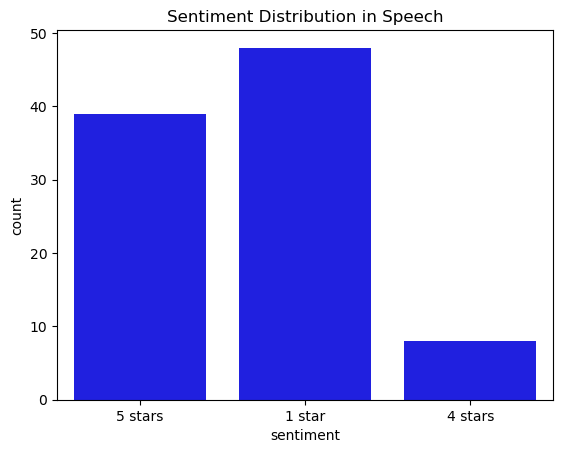

In [112]:
from transformers import pipeline

# Load a BERT sentiment analysis model
sentiment_model = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Apply sentiment analysis to each paragraph
df['sentiment'] = df['paragraph'].apply(lambda x: sentiment_model(x)[0]['label'])

# Show sentiment distribution per paragraph
#sns.countplot(data=df, x='sentiment', palette='coolwarm')
sns.countplot(data=df, x='sentiment', color="blue")
plt.title("Sentiment Distribution in Speech")
plt.show()


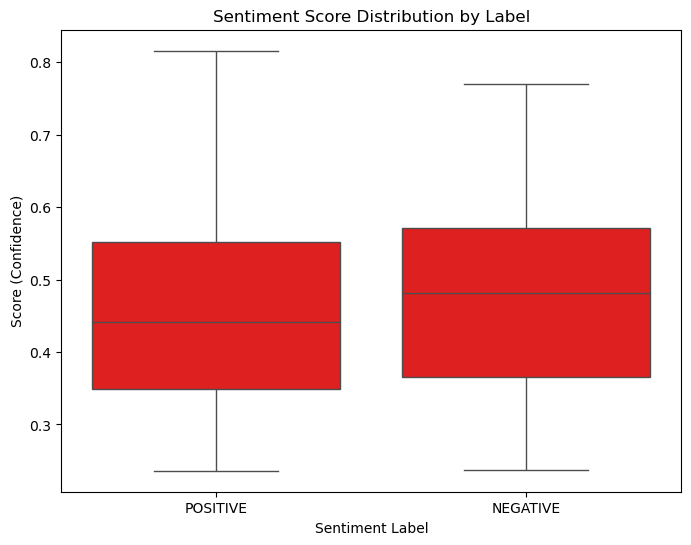

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='label', y='score', color='red')
plt.title('Sentiment Score Distribution by Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Score (Confidence)')
plt.show()


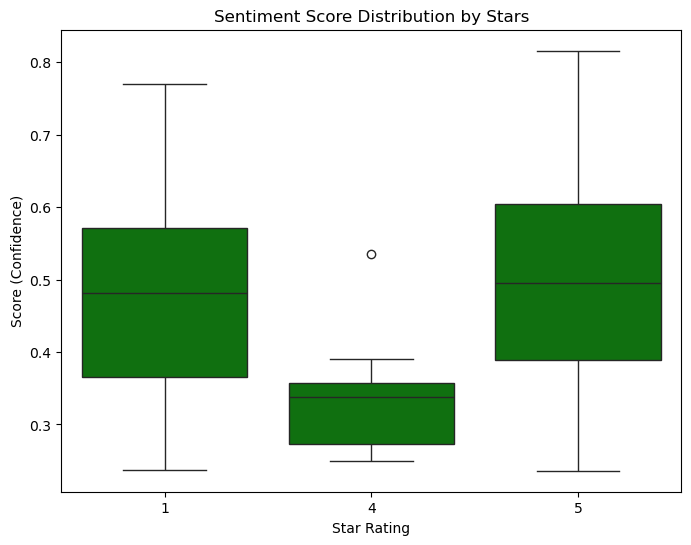

In [118]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='stars', y='score', color='green')
plt.title('Sentiment Score Distribution by Stars')
plt.xlabel('Star Rating')
plt.ylabel('Score (Confidence)')
plt.show()

In [119]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the entire speech text into TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['paragraph'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topics = lda.fit_transform(X)

# Check top words for each topic
terms = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx}:")
    print(", ".join([terms[i] for i in topic.argsort()[:-10 - 1:-1]]))


Topic #0:
higher, wage, year, minimum, costs, years, equal, act, jobs, work
Topic #1:
deficit, make, reduction, care, families, right, tax, thank, cuts, democracy
Topic #2:
jobs, energy, lets, america, american, cuts, stronger, im, new, need
Topic #3:
look, country, united, years, god, bless, home, like, americans, decisions
Topic #4:
right, people, task, young, need, expect, mr, vote, finish, question


[nltk_data] Downloading package punkt to /Users/tico/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


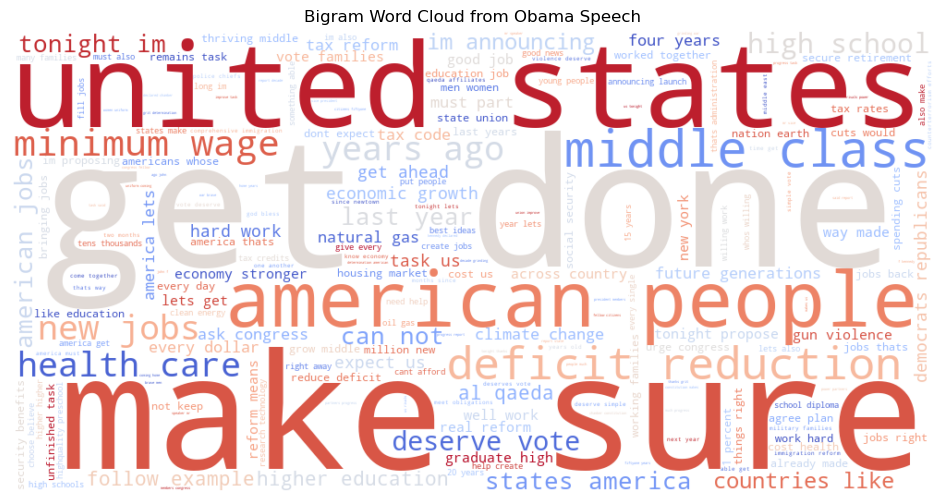

In [120]:
from nltk.util import ngrams
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

# Download tokenizer if needed
nltk.download('punkt')

# Tokenize and collect all words from the cleaned paragraphs
all_words = []
for text in df['paragraph']:
    tokens = nltk.word_tokenize(text)
    all_words.extend(tokens)

# Generate bigrams from tokens
bigrams = list(ngrams(all_words, 2))

# Count frequency of bigrams
bigram_freq = Counter(bigrams)

# Convert bigrams from tuples to strings
bigram_strings = {' '.join(b): count for b, count in bigram_freq.items()}

# Generate word cloud from bigram frequencies
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='coolwarm').generate_from_frequencies(bigram_strings)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Bigram Word Cloud from Obama Speech')
plt.show()



Let's Plot the sentiment score or star rating in order of the paragraphs — a simple line plot will visually show how the tone shifts across the speech. This is good for discussing rhetorical pacing.

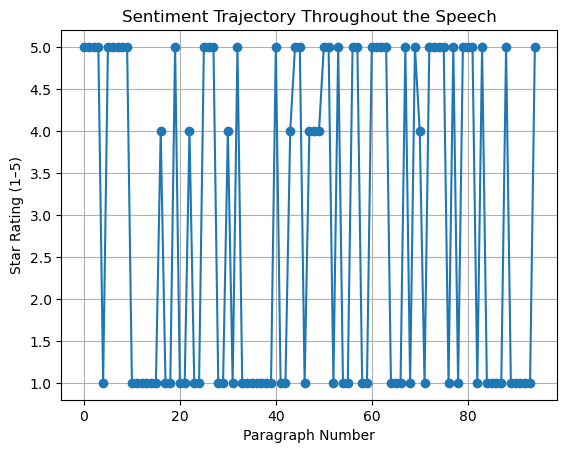

In [121]:
import matplotlib.pyplot as plt

plt.plot(df['stars'], marker='o')
plt.title("Sentiment Trajectory Throughout the Speech")
plt.xlabel("Paragraph Number")
plt.ylabel("Star Rating (1–5)")
plt.grid(True)
plt.show()


Positive: [(('get', 'done'), 6), (('american', 'people'), 5), (('make', 'sure'), 5), (('united', 'states'), 4), (('tonight', 'im'), 4), (('im', 'announcing'), 4), (('high', 'school'), 4), (('minimum', 'wage'), 4), (('years', 'ago'), 3), (('middle', 'class'), 3)]
Negative: [(('deficit', 'reduction'), 5), (('deserve', 'vote'), 5), (('united', 'states'), 4), (('get', 'done'), 4), (('follow', 'example'), 4), (('democrats', 'republicans'), 3), (('health', 'care'), 3), (('middle', 'class'), 3), (('new', 'jobs'), 3), (('last', 'year'), 3)]


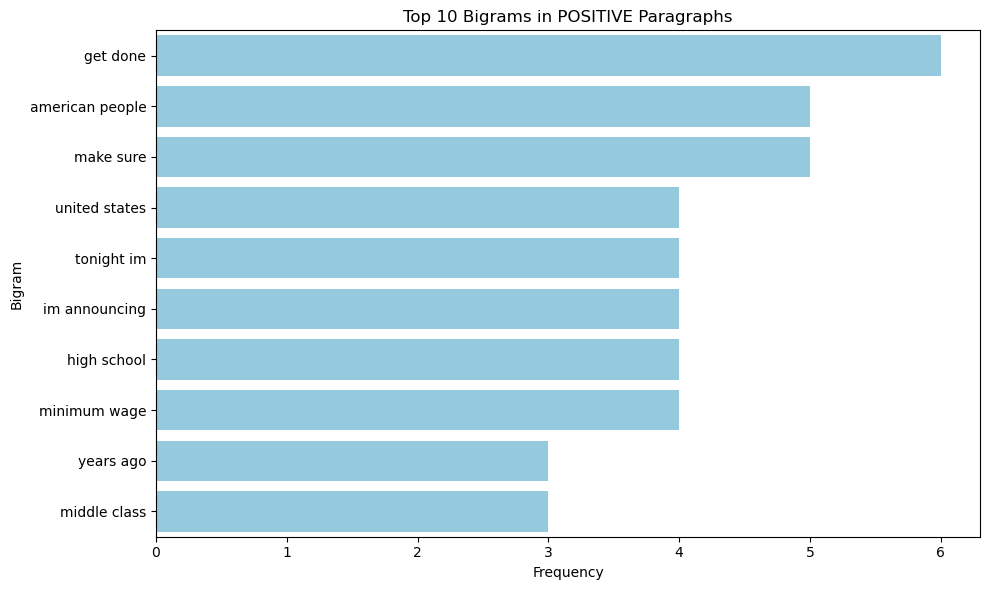

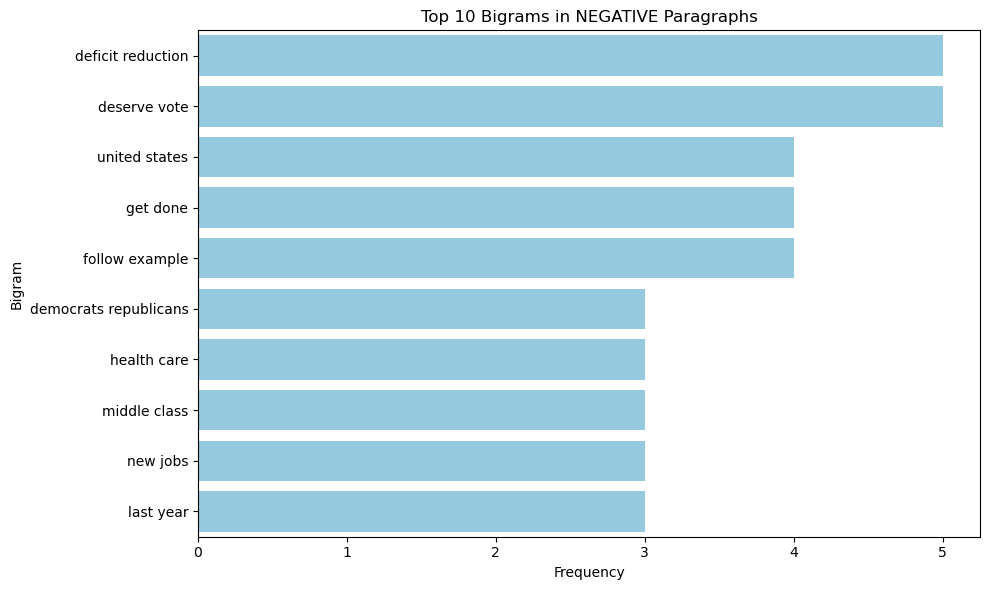

In [122]:
from nltk import bigrams
from collections import Counter

def get_top_bigrams(label, n=10):
    texts = df[df['label'] == label]['paragraph']
    tokens = [word for p in texts for word in p.split()]
    bigram_list = list(bigrams(tokens))
    return Counter(bigram_list).most_common(n)

print("Positive:", get_top_bigrams('POSITIVE'))
print("Negative:", get_top_bigrams('NEGATIVE'))

import matplotlib.pyplot as plt
import seaborn as sns
from nltk import bigrams
from collections import Counter

def plot_top_bigrams_by_sentiment(label, n=10):
    texts = df[df['label'] == label]['paragraph']
    tokens = [word for p in texts for word in p.split()]
    bigram_list = list(bigrams(tokens))
    bigram_counts = Counter(bigram_list).most_common(n)
    
    bigrams_text = [' '.join(b) for b, _ in bigram_counts]
    counts = [c for _, c in bigram_counts]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts, y=bigrams_text, color="skyblue")
    plt.title(f"Top {n} Bigrams in {label} Paragraphs")
    plt.xlabel("Frequency")
    plt.ylabel("Bigram")
    plt.tight_layout()
    plt.show()

# Call this for each sentiment type
plot_top_bigrams_by_sentiment('POSITIVE')
plot_top_bigrams_by_sentiment('NEGATIVE')


In [123]:
print("Most Positive Paragraph:")
print(df.loc[df['stars'].idxmax(), 'paragraph'])

print("\nMost Negative Paragraph:")
print(df.loc[df['stars'].idxmin(), 'paragraph'])


Most Positive Paragraph:
mr speaker mr vice president members congress fellow citizens

Most Negative Paragraph:
gather knowing millions americans whose hard work dedication yet rewarded economy adding jobs many people still cant find fulltime employment corporate profits skyrocketed alltime highs decade wages incomes barely budged


In [124]:
from nltk import word_tokenize
all_words = [word for p in df['paragraph'] for word in word_tokenize(p)]
lexical_diversity = len(set(all_words)) / len(all_words)
print(f"Lexical Diversity: {lexical_diversity:.2f}")


Lexical Diversity: 0.44
